<a href="https://colab.research.google.com/github/Nuria-01/MASTER_UNED_NuriaFdez/blob/main/Trabajo_Fin_de_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de scoring para predecir el riesgo de impago en clientes financieros
**Trabajo de Fin de Máster**

*Autora: Nuria Fernández Rodríguez*

*Tutores:*

## Introducción

La gestión del riesgo crediticio constituye uno de los pilares fundamentales en el sector financiero. Predecir la probabilidad de que un cliente incumpla el pago de su tarjeta de crédito no solo permite minimizar pérdidas económicas, sino que también ayuda a diseñar estrategias más eficientes de concesión y recuperación de crédito. En este contexto, los modelos de **machine learning** se han convertido en herramientas clave para complementar y, en algunos casos, superar a los métodos estadísticos tradicionales en términos de precisión y capacidad de adaptación.

El presente trabajo tiene como objetivo desarrollar un modelo predictivo de impago (default) utilizando un conjunto de datos ampliamente referenciado en la literatura académica y en competiciones de análisis de datos: el dataset de tarjetas de crédito de **Taiwán** (cuyo enlace está en la bibliografía de este trabajo), recopilado originalmente por una entidad financiera local y publicado de manera anonimizada en repositorios académicos. Este conjunto de datos contiene información de 30.000 clientes, incluyendo variables sociodemográficas, financieras y comportamentales (límites de crédito, historial de facturación y pagos, retrasos en los meses previos, entre otros). Su uso en el ámbito académico se debe a que refleja de manera realista la problemática de la predicción de default y permite evaluar la eficacia de diferentes técnicas de modelización.

A lo largo de este trabajo se seguirá el flujo habitual en **proyectos de data science**:

1. **Análisis exploratorio de los datos**, para comprender las variables y sus relaciones.

2. **Ingeniería de variables**, con el fin de generar métricas derivadas que capturen mejor los patrones de riesgo crediticio.

3. **Construcción de modelos predictivos**, comenzando con la regresión logística como modelo base, y avanzando hacia algoritmos más potentes como XGBoost y CatBoost.

4. **Evaluación de resultados** mediante métricas de clasificación como el AUC-ROC, la matriz de confusión y el reporte de precisión, recall y f1-score.

5. **Propuesta de productivización**, en la que se muestra cómo este tipo de modelos podrían integrarse en el flujo de decisiones de una entidad financiera real.

Con ello, se pretende no solo alcanzar un buen desempeño predictivo, sino también ilustrar el valor añadido que aportan los modelos de **machine learning** en un ámbito de gran relevancia práctica como es la concesión de crédito.

## Descripción del Dataset

Nuestro dataset contiene información de pagos predetermiandos, factores demográficos, datos de créditos, historial de pagos, y extratos de facturas de tarjetas de crédito de clientes en Taiwan desde Abril de 2005 hasta Septiembre de 2005.

### Contenido
Hay 25 variables:

* `ID`: Identificación de cada cliente

* `LIMIT_BAL`: Cantidad del crédito otorgado en dólares taiwaneses (incluye crédito individual y familiar/suplementario)

* `SEX`: Género (1=hombre, 2=mujer)

* `EDUCATION`: Educación (1=posgrado, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0 = desconocido)

* `MARRIAGE`: Estado civil (1=casado, 2=soltero, 3=otros, 0=desconocido)

* `AGE`: Edad en años (va de 21-79)

* `PAY_0`: Estado del pago en septiembre de 2005 (-1=pago puntual, 1=retraso de pago de un mes, 2=retraso de dos meses, … 8=retraso de ocho meses, 9=retraso de nueve meses o más)

* `PAY_2`: Estado del pago en agosto de 2005 (misma escala que arriba)

* `PAY_3`: Estado del pago en julio de 2005 (misma escala que arriba)

* `PAY_4`: Estado del pago en junio de 2005 (misma escala que arriba)

* `PAY_5`: Estado del pago en mayo de 2005 (misma escala que arriba)

* `PAY_6`: Estado del pago en abril de 2005 (misma escala que arriba)

* `BILL_AMT1`: Cantidad de la factura en septiembre de 2005 (en dólares taiwaneses)

* `BILL_AMT2`: Cantidad de la factura en agosto de 2005 (en dólares taiwaneses)

* `BILL_AMT3`: Cantidad de la factura en julio de 2005 (en dólares taiwaneses)

* `BILL_AMT4`: Cantidad de la factura en junio de 2005 (en dólares taiwaneses)

* `BILL_AMT5`: Cantidad de la factura en mayo de 2005 (en dólares taiwaneses)

* `BILL_AMT6`: Cantidad de la factura en abril de 2005 (en dólares taiwaneses)

* `PAY_AMT1`: Cantidad del pago anterior en septiembre de 2005 (en dólares taiwaneses)

* `PAY_AMT2`: Cantidad del pago anterior en agosto de 2005 (en dólares taiwaneses)

* `PAY_AMT3`: Cantidad del pago anterior en julio de 2005 (en dólares taiwaneses)

* `PAY_AMT4`: Cantidad del pago anterior en junio de 2005 (en dólares taiwaneses)

* `PAY_AMT5`: Cantidad del pago anterior en mayo de 2005 (en dólares taiwaneses)

* `PAY_AMT6`: Cantidad del pago anterior en abril de 2005 (en dólares taiwaneses)

* `default.payment.next.month`: Pago en incumplimiento (1=sí, 0=no)


Vamos a empezar leyendo el dataset con **pandas** y ver qué forma tiene:

In [1]:
# Primero, los imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import shapiro

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Leemos el archivo
df = pd.read_csv( '/content/default of credit card clients.csv', sep = ';', header=1, index_col=0)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Vemos que se lee todo correctamente con este ejemplo de 5 filas. Ahora vamos a ver de qué tipo son las variables:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

Como vemos, todas las variables son números enteros. Esto es lógico, pues nuestro conjunto de datos viene de tal manera que en las variables categóricas, a cada categoría se le ha asignado un número entero. Por ejemplo, en la categoría de género, se ha asignado el número 1 al género masculino y el número 2 al género femenino. Por tanto, nuestro primer trabajo en el siguiente apartado de preparación de los datos va a ser identificar todas estas variables categóricas y asignarles el nombre de la categoría que les corresponde.

## Preparación, Transformación y Limpieza de los Datos

En primer lugar, vamos a identificar las variables categóricas. Serían `SEX`, `EDUCATION`, `MARRIAGE`, `AGE`, `PAY_x` y `default payment next month`. Sustituiremos primero cada valor entero por la categoría correspondiente, excepto en las variables `AGE` y `PAY_x`, en las que cada valor numérico va a ser un categoría.


Cabe comentar que tanto en ``MARRIAGE`` como en ``EDUCATION`` hay varios números o categorías asociadas a lo mismo. Por ejemplo, en ``MARRIAGE`` los valores 3 y 0 se asocian a las categorías *Otros* y *Desconocido*, que las podemos agrupar dentro de *Desconocido*. Con esto conseguimos salvar problemas de codificación más adelante, consiguiendo variables que no estén desglosadas en categorías repetidas o equivalentes.

In [4]:
df['SEX'] = df['SEX'].replace({1: 'Hombre', 2: 'Mujer'})
df['EDUCATION'] = df['EDUCATION'].replace({1: 'Posgrado', 2: 'Universidad', 3: 'Secundaria', 4: 'Desconocido', 5: 'Desconocido', 6: 'Desconocido', 0: 'Desconocido'})
df['MARRIAGE'] = df['MARRIAGE'].replace({1: 'Casado', 2: 'Soltero', 3: 'Desconocido', 0: 'Desconocido'})
df['default payment next month'] = df['default payment next month'].replace({1: 'Sí', 0: 'No'})

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,Mujer,Universidad,Casado,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Sí
2,120000,Mujer,Universidad,Soltero,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Sí
3,90000,Mujer,Universidad,Soltero,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
4,50000,Mujer,Universidad,Casado,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
5,50000,Hombre,Universidad,Casado,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


Vamos a ver de qué tipo son ahora las cuatro variables que acabamos de cambiar:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  int64 
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  int64 
 5   PAY_0                       30000 non-null  int64 
 6   PAY_2                       30000 non-null  int64 
 7   PAY_3                       30000 non-null  int64 
 8   PAY_4                       30000 non-null  int64 
 9   PAY_5                       30000 non-null  int64 
 10  PAY_6                       30000 non-null  int64 
 11  BILL_AMT1                   30000 non-null  int64 
 12  BILL_AMT2                   30000 non-null  int64 
 13  BILL_AMT3                   30000 non-null  int64 


Vemos que son de tipo `object`. Vamos a cambiarlos a tipo `category`, lo cual tiene ciertas ventajas frente a `object`:

* Menor uso de memoria: almacena internamente los valores como enteros y un diccionario de categorías.

* Más rápido en operaciones como filtrado, agrupamiento (groupby) y ordenamiento.

* Permite definir un orden lógico si las categorías tienen jerarquía (por ejemplo, "bajo", "medio", "alto").

Además de cambiar estas tres variables, cambiaremos el resto de variables categóricas que habíamos mencionado: `AGE` y `PAY_x`. Simplemente tenemos que transformarlas en cartegóricas. Además, a diferencia de las variables ``BILL_AMTx`` y ``PAY_AMTx``, esta variable empieza nombrándose por el número 0, pasa al 2, y así hasta el 6. Por lo que vamos a cambiar también el nombre de la columna ``PAY_0`` por ``PAY_1``.

In [6]:
df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['AGE'] = df['AGE'].astype('category')
df['default payment next month'] = df['default payment next month'].astype('category')

df = df.rename(columns={'PAY_0': 'PAY_1'})
pay_cols = [f'PAY_{i}' for i in range(1, 7)]
df[pay_cols] = df[pay_cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  int64   
 1   SEX                         30000 non-null  category
 2   EDUCATION                   30000 non-null  category
 3   MARRIAGE                    30000 non-null  category
 4   AGE                         30000 non-null  category
 5   PAY_1                       30000 non-null  category
 6   PAY_2                       30000 non-null  category
 7   PAY_3                       30000 non-null  category
 8   PAY_4                       30000 non-null  category
 9   PAY_5                       30000 non-null  category
 10  PAY_6                       30000 non-null  category
 11  BILL_AMT1                   30000 non-null  int64   
 12  BILL_AMT2                   30000 non-null  int64   
 13  BILL_AMT3            

Ya tendríamos nuestro dataset en condiciones para realizar análisis estadísticos e implementar un modelado predictivo.

Ahora, si quisiéramos tener una tabla más compacta de cara a hacer análisis más visuales como, por ejemplo, gráficos estadísticos, nos tenemos que fijar en todas las variables que explican el estado del pago, la facturación mensual y los pagos realizados. Vemos que para cada uno de estos casos, hay 6 variables correspondientes a los 6 meses, desde abril hasta septiembre de 2005. Lo que podemos hacer entonces es crear una nueva variable que se llame `MONTH` y denote estos meses, de manera que todas las otras variables expandidas se reduzcan a: `PAY`, `BILL_AMT`, y `PAY_AMT`. Esto es una operación conocida como **wide_to_long**, es decir, *de ancho a largo*, y existe un comando para ello en pandas.

Por tanto, primero vamos a "guardar" el conjunto de datos que hemos obtenido hasta ahora como *df_wide*, ya que nos seguirá siendo necesario según qué análisis estemos haciendo. Y vamos a realizar esta operación **wide_to_long** obteniendo un nuevo dataset que llamaremos *df_long*.

In [7]:
df_wide = df.copy()

In [8]:
# Renombramos columnas PAY_0, ..., PAY_6 a PAY1, ..., PAY6 (esto lo hacemos para que el wide_to_long no de error)
df_renamed = df.rename(columns={
    'PAY_1': 'PAY1',
    'PAY_2': 'PAY2',
    'PAY_3': 'PAY3',
    'PAY_4': 'PAY4',
    'PAY_5': 'PAY5',
    'PAY_6': 'PAY6'
}).reset_index()

# Listamos columnas para el wide_to_long, ya que no podemos meter todo el dataset
cols_long = ['ID'] + [col for col in df_renamed.columns if col.startswith(('PAY', 'BILL_AMT', 'PAY_AMT'))]

# Filtramos las columnas
df_to_long = df_renamed[cols_long]

# Aplicamos el wide_to_long
df_result = pd.wide_to_long(
    df_to_long,
    stubnames=['PAY', 'BILL_AMT', 'PAY_AMT'],
    i='ID',
    j='MONTH',
    sep='',
    suffix='[1-6]'
).reset_index()

# Mapeamos los meses
month_map = {1: 'septiembre', 2: 'agosto', 3: 'julio', 4: 'junio', 5: 'mayo', 6: 'abril'}
df_result['MONTH'] = df_result['MONTH'].map(month_map)

# Quitamos las columnas wide con sufijos (las que terminan en dígitos)
cols_to_drop = [col for col in df_result.columns if col[-1].isdigit() and any(prefix in col for prefix in ['BILL_AMT', 'PAY_AMT', 'PAY'])]
df_result_clean = df_result.drop(columns=cols_to_drop)

# Extraemos las columnas estáticas de df_renamed (las que no tienen sufijo numérico)
static_cols = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'LIMIT_BAL', 'default payment next month']
df_static = df_renamed[static_cols].drop_duplicates(subset='ID')  # por si acaso

# Ahora hacemos el merge
df_long = df_result_clean.merge(df_static, on='ID', how='left')

df_long

,ID,MONTH,PAY,BILL_AMT,PAY_AMT,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,default payment next month
0,1,septiembre,2,3913,0,Mujer,Universidad,Casado,24,20000,Sí
1,2,septiembre,-1,2682,0,Mujer,Universidad,Soltero,26,120000,Sí
2,3,septiembre,0,29239,1518,Mujer,Universidad,Soltero,34,90000,No
3,4,septiembre,0,46990,2000,Mujer,Universidad,Casado,37,50000,No
4,5,septiembre,-1,8617,2000,Hombre,Universidad,Casado,57,50000,No
...,...,...,...,...,...,...,...,...,...,...,...
179995,29996,abril,0,15980,1000,Hombre,Secundaria,Casado,39,220000,No
179996,29997,abril,0,0,0,Hombre,Secundaria,Soltero,43,150000,No
179997,29998,abril,0,19357,3100,Hombre,Universidad,Soltero,37,30000,Sí
179998,29999,abril,-1,48944,1804,Hombre,Secundaria,Casado,41,80000,Sí


Observamos que después de haber hecho este wide_to_long, hemos pasado de tener 30000 filas a 180000, como es lógico, ya que cada uno de los clientes aparece ahora 6 veces repetido, (por los 6 meses distintos para los que hay datos). Y el número de columnas se ha reducido por la misma razón. Vamos a ver, por ejemplo, todas las columnas en las que aparece el cliente con ID = 1:

In [9]:
df_long[df_long['ID'] == 1]

,ID,MONTH,PAY,BILL_AMT,PAY_AMT,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,default payment next month
0,1,septiembre,2,3913,0,Mujer,Universidad,Casado,24,20000,Sí
30000,1,agosto,2,3102,689,Mujer,Universidad,Casado,24,20000,Sí
60000,1,julio,-1,689,0,Mujer,Universidad,Casado,24,20000,Sí
90000,1,junio,-1,0,0,Mujer,Universidad,Casado,24,20000,Sí
120000,1,mayo,-2,0,0,Mujer,Universidad,Casado,24,20000,Sí
150000,1,abril,-2,0,0,Mujer,Universidad,Casado,24,20000,Sí


Efectivamente, sale 6 veces. Vamos a comprobar ahora el tipo de variables que tenemos:

In [10]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   ID                          180000 non-null  int64   
 1   MONTH                       180000 non-null  object  
 2   PAY                         180000 non-null  int64   
 3   BILL_AMT                    180000 non-null  int64   
 4   PAY_AMT                     180000 non-null  int64   
 5   SEX                         180000 non-null  category
 6   EDUCATION                   180000 non-null  category
 7   MARRIAGE                    180000 non-null  category
 8   AGE                         180000 non-null  category
 9   LIMIT_BAL                   180000 non-null  int64   
 10  default payment next month  180000 non-null  category
dtypes: category(5), int64(5), object(1)
memory usage: 9.1+ MB


Esta nueva variable que hemos creado, ``MONTH``, es de tipo *object*. Podríamos dejarla así, pero vamos a ponerla de tipo *category* de manera que nos permita ordenar correctamente los meses en caso de necesidad. Además, este tipo de variables ahorra memoria.

Por último, para evitar confusiones, vamos a ponerle el tipo *cathegory* también a la variable `ID`.

In [11]:
df_long['MONTH'] = df_long['MONTH'].astype('category')
df_long['ID'] = df_long['ID'].astype('category')
df = df_long   # como ya vamos a trabajar con df_final a partir de aquí, lo volvemos a llamar df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   ID                          180000 non-null  category
 1   MONTH                       180000 non-null  category
 2   PAY                         180000 non-null  int64   
 3   BILL_AMT                    180000 non-null  int64   
 4   PAY_AMT                     180000 non-null  int64   
 5   SEX                         180000 non-null  category
 6   EDUCATION                   180000 non-null  category
 7   MARRIAGE                    180000 non-null  category
 8   AGE                         180000 non-null  category
 9   LIMIT_BAL                   180000 non-null  int64   
 10  default payment next month  180000 non-null  category
dtypes: category(7), int64(4)
memory usage: 8.1 MB


In [12]:
# Exportar a CSV sin el índice
df.to_csv('df_long.csv', index=False)


#from google.colab import files
#files.download('df_long.csv')


## Análisis Exploratorio de Datos (EDA)

### Estudio Univariado

Llega el momento de **estudiar descriptivamente** cada una de las variables:

* **Variables numéricas**: Vamos a inspeccionar las distribuciones de estas variables, con la función ``describe``, con la que obtendremos características como la media, desviación estándar o cuartiles. Después representaremos sus histogramas para entender de forma más visual lo que implican las cantidades anteriores. Las variables en cuestión son ``BILL_AMT``, ``PAY_AMT`` y ``LIMIT_BALL``.

* **Variables categóricas**: Queremos la frecuencia con la que aparecen cada una de las categorías, para detectar si existen sesgos que haya que tener en cuenta en el posterior modelo. Además, hay algunas variables que tienen muchas categorías, como ``AGE`` por ejemplo, así que vamos a ver en función de la frecuencia de cada una de ellas, si podemos simplificarla agrupando algunas de esas categorías en una.

#### Variables numéricas

In [13]:
## VARIABLE BILL_AMT

# Definimos el orden correcto de los meses
orden_meses = ['abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre']

# Convertir la columna MONTH a tipo categórico con orden
df_long['MONTH'] = pd.Categorical(df_long['MONTH'], categories=orden_meses, ordered=True)

# Ahora agrupar y describir
df_long.groupby('MONTH')['BILL_AMT'].describe().round(2)


/tmp/ipython-input-43563290.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_long.groupby('MONTH')['BILL_AMT'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
MONTH,,,,,,,,
abril,30000.0,38871.76,59554.11,-339603.0,1256.00,17071.0,49198.25,961664.0
mayo,30000.0,40311.40,60797.16,-81334.0,1763.00,18104.5,50190.50,927171.0
junio,30000.0,43262.95,64332.86,-170000.0,2326.75,19052.0,54506.00,891586.0
julio,30000.0,47013.15,69349.39,-157264.0,2666.25,20088.5,60164.75,1664089.0
agosto,30000.0,49179.08,71173.77,-69777.0,2984.75,21200.0,64006.25,983931.0
septiembre,30000.0,51223.33,73635.86,-165580.0,3558.75,22381.5,67091.00,964511.0


Observamos en esta variable ``BILL_AMT`` que hay una **tendencia creciente mes a mes en el gasto facturado**, tanto en la media como en la mediana. Hay valores negativos (posiblemente devoluciones o correcciones contables), aunque poco frecuentes. La dispersión es muy alta, lo que indica una gran variedad de comportamientos financieros.

In [14]:
## VARIABLE PAY_AMT

df_long.groupby('MONTH')['PAY_AMT'].describe().round(2)

/tmp/ipython-input-680321534.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_long.groupby('MONTH')['PAY_AMT'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
MONTH,,,,,,,,
abril,30000.0,5215.50,17777.47,0.0,117.75,1500.0,4000.00,528666.0
mayo,30000.0,4799.39,15278.31,0.0,252.50,1500.0,4031.50,426529.0
junio,30000.0,4826.08,15666.16,0.0,296.00,1500.0,4013.25,621000.0
julio,30000.0,5225.68,17606.96,0.0,390.00,1800.0,4505.00,896040.0
agosto,30000.0,5921.16,23040.87,0.0,833.00,2009.0,5000.00,1684259.0
septiembre,30000.0,5663.58,16563.28,0.0,1000.00,2100.0,5006.00,873552.0


En esta variable ``PAY_AMT``, que es la de los pagos realizados, se observa también una **tendencia al alza en los pagos mensuales**, aunque mucho más moderada. La mediana está consistentemente por debajo de la media, por lo que tenemos una **distribución sesgada a la derecha**. Esto quiere decir que muchos pagan poco, y pocos pagan mucho. Existen valores extremos muy grandes que impactan fuertemente la media.

In [15]:
## VARIABLE LIMIT_BAL

# Para ella, utilizamos el dataset wide, ya que queremos saber la distribución por cliente
df_wide['LIMIT_BAL'].describe().round(2)

,LIMIT_BAL
count,30000.00
mean,167484.32
std,129747.66
min,10000.00
25%,50000.00
50%,140000.00
75%,240000.00
max,1000000.00


Hay **mucha variabilidad en los límites de crédito**. La media está algo por encima de la mediana, lo que sugiere que hay clientes con límites muy altos que elevan la media. La mayoría de los clientes tienen entre 50.000 y 240.000 euros de límite. El límite máximo (1 millón) indica casos excepcionales.

Por tanto, como conclusión general:
* Los gastos (``BILL_AMT``) aumentan con los meses, lo que indica una posible acumulación de deuda o aumento del consumo.

* Los pagos (``PAY_AMT``) también crecen, pero no al mismo ritmo ni con la misma consistencia.

+ Los límites de crédito (``LIMIT_BAL``) están distribuidos de forma desigual, con algunos valores extremos que probablemente corresponden a clientes premium.

Vamos a ver ahora la representación de todos estos datos. Lo vamos a hacer limitando el rango del eje X para que no se distorsionen los valores extremos (*outliers*) y la forma de la distribución se vea mejor.

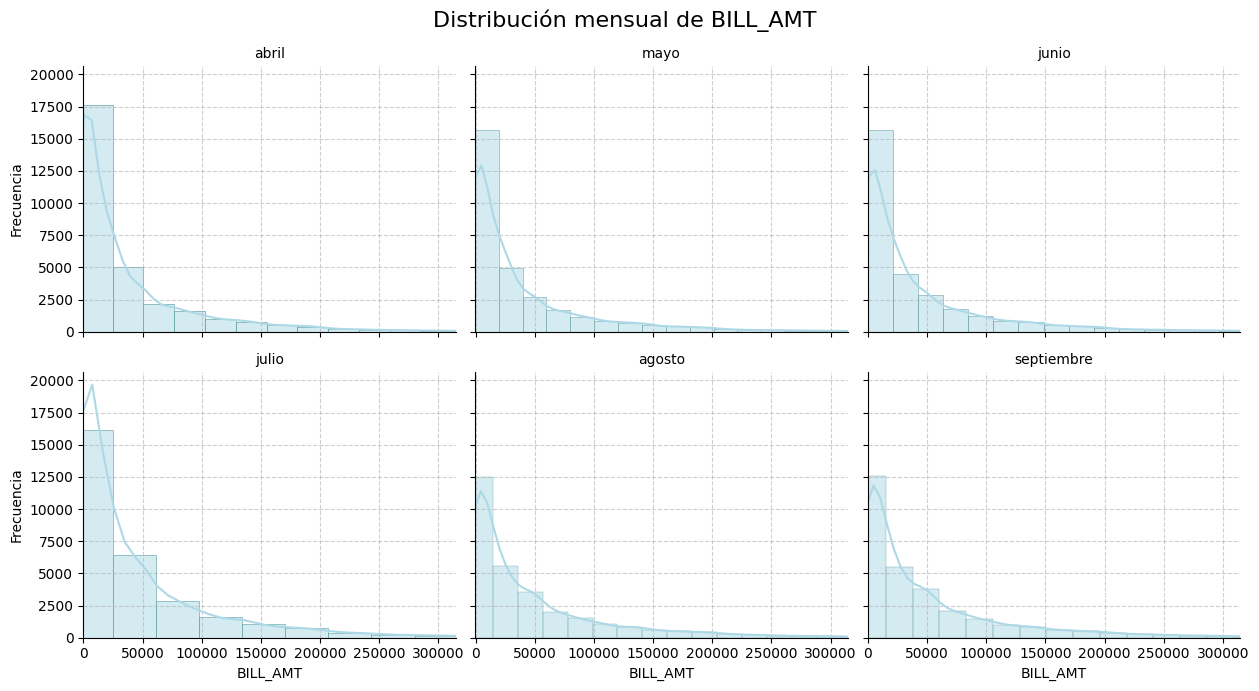

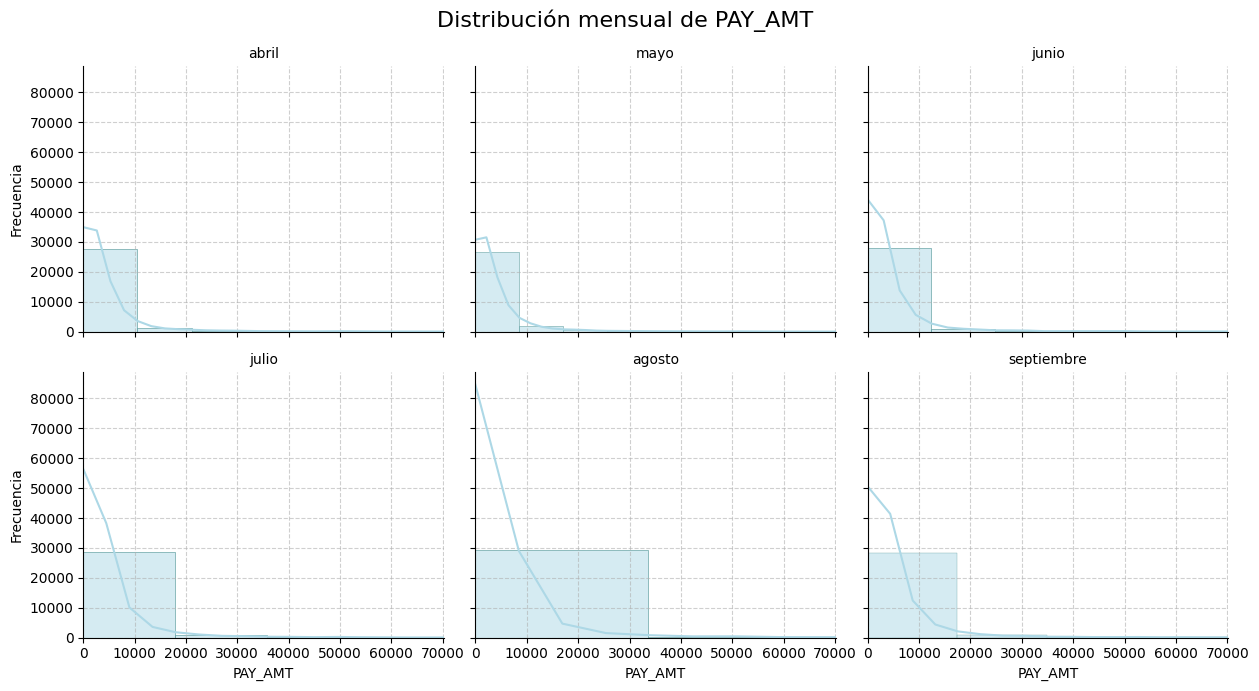

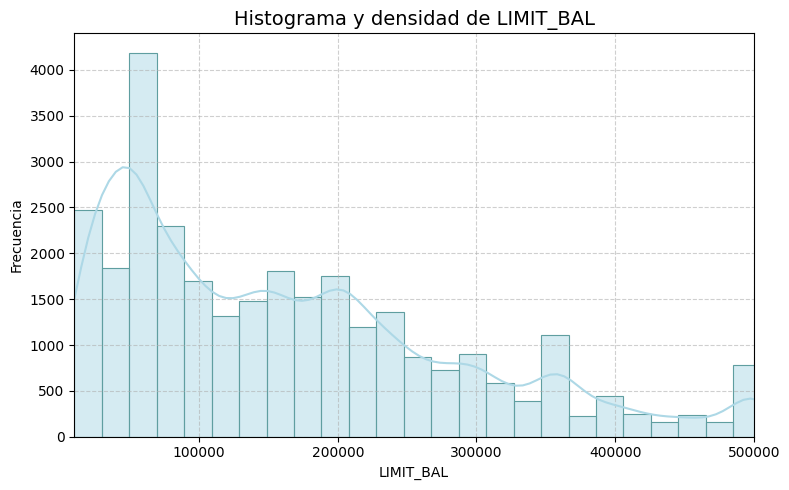

In [16]:
# ======= 1. Distribuciones por mes para BILL_AMT y PAY_AMT =======
vars_mes = ['BILL_AMT', 'PAY_AMT']

for var in vars_mes:
    # Calcular percentiles globales para limitar los ejes
    p1 = df_long[var].quantile(0.01)
    p99 = df_long[var].quantile(0.99)

    # Crear grid de histogramas por mes
    g = sns.FacetGrid(df_long, col="MONTH", col_wrap=3, height=3.5, aspect=1.2)
    g.map_dataframe(sns.histplot, x=var, kde=True, color='lightblue', edgecolor='cadetblue', bins=50)

    # Limitar eje x en cada gráfico
    for ax in g.axes.flatten():
        ax.set_xlim(p1, p99)
        ax.grid(True, linestyle='--', alpha=0.6)

    g.set_titles(col_template="{col_name}")
    g.set_axis_labels(var, "Frecuencia")
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Distribución mensual de {var}', fontsize=16)
    plt.show()

# ======= 2. Distribución global de LIMIT_BAL (no varía por mes) =======
var = 'LIMIT_BAL'
p1 = df_wide[var].quantile(0.01)
p99 = df_wide[var].quantile(0.99)

plt.figure(figsize=(8, 5))
sns.histplot(df_wide[var], kde=True, color='lightblue', edgecolor='cadetblue', bins=50)
plt.xlim(p1, p99)
plt.title(f'Histograma y densidad de {var}', fontsize=14)
plt.xlabel(var)
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Lo primero que observamos es que los histogramas de ``PAY_AMT`` y ``BILL_AMT`` claramente no siguen una distribución normal. Es completamente normal que nos salgan con esa forma tan sesgada hacia la izquierda y con una cola larga hacia la derecha (distribución altamente asimétrica o "long tail"), ya que es muy común en variables económicas o financieras.

La razón de que ocurra esto es que la mayoría de clientes pagan y deben cantidades pequeñas o moderadas. Un pequeño número de clientes tiene deudas o pagos extremadamente altos, lo que crea una distribución sesgada con valores atípicos (outliers). Al tener valores tan extremos, los histogramas se "aplanan" y parece que todo está concentrado en el eje Y.

En cuanto a la variable ``LIMIT_BAL``, también observamos que no es normal. Sin embargo, para comprobarlo, vamos a realizar el **test de Shapiro-Wilk**.

In [17]:
## SHAPIRO TEST

# Tomamos una muestra (máx. 5000 observaciones) para cumplir la restricción del test
sample_limit_bal = df_wide['LIMIT_BAL'].sample(5000, random_state=42)

# Aplicamos el test de Shapiro-Wilk
stat, p_value = shapiro(sample_limit_bal)

# Mostramos los resultados
print("Shapiro-Wilk Test para LIMIT_BAL")
print(f"Estadístico W: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

if p_value < 0.05:
    print("→ Rechazamos la hipótesis nula: LIMIT_BAL no sigue una distribución normal.")
else:
    print("→ No se rechaza la hipótesis nula: LIMIT_BAL podría seguir una distribución normal.")



Shapiro-Wilk Test para LIMIT_BAL
Estadístico W: 0.9110
p-valor: 0.0000
→ Rechazamos la hipótesis nula: LIMIT_BAL no sigue una distribución normal.


Como acabamos de comprobar, **ninguna de las variables sigue una distribución normal**. Esto es coherente con la fuerte asimetría que presentan los datos, especialmente en ``PAY_AMT``, donde la mayoría de los valores se concentran cerca de cero, pero existen algunos pagos extraordinariamente elevados. Esta falta de normalidad no supone un problema en sí misma, pero sí **debe tenerse en cuenta al elegir el modelo predictivo más adecuado**. En particular, descarta la idoneidad de técnicas paramétricas clásicas que dependen de esta suposición, como la regresión lineal simple o múltiple. Por tanto, será más apropiado optar por modelos robustos frente a distribuciones no normales, como los árboles de decisión o técnicas de clasificación basadas en particiones, que no requieren transformaciones previas ni suposiciones estrictas sobre la distribución de las variables predictoras.

#### Variables categóricas

Vamos a analizar ahora las variables categóricas, para ver la frecuencia absoluta de aparición de cada una de las categorías.

In [18]:
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',  'PAY_2',  'PAY_3',  'PAY_4',  'PAY_5',  'PAY_6', 'default payment next month']

for col in cat_cols:
    print(f"\nFrecuencias para '{col}':")
    freq = df_wide[col].value_counts(dropna=False)
    percent = df_wide[col].value_counts(normalize=True, dropna=False) * 100
    freq_df = pd.DataFrame({'Frecuencia': freq, 'Porcentaje': percent.round(2)})
    display(freq_df)


Frecuencias para 'SEX':


,Frecuencia,Porcentaje
SEX,,
Mujer,18112,60.37
Hombre,11888,39.63



Frecuencias para 'EDUCATION':


,Frecuencia,Porcentaje
EDUCATION,,
Universidad,14030,46.77
Posgrado,10585,35.28
Secundaria,4917,16.39
Desconocido,468,1.56



Frecuencias para 'MARRIAGE':


,Frecuencia,Porcentaje
MARRIAGE,,
Soltero,15964,53.21
Casado,13659,45.53
Desconocido,377,1.26



Frecuencias para 'AGE':


,Frecuencia,Porcentaje
AGE,,
29,1605,5.35
27,1477,4.92
28,1409,4.70
30,1395,4.65
26,1256,4.19
31,1217,4.06
25,1186,3.95
34,1162,3.87
32,1158,3.86



Frecuencias para 'PAY_1':


,Frecuencia,Porcentaje
PAY_1,,
0,14737,49.12
-1,5686,18.95
1,3688,12.29
-2,2759,9.20
2,2667,8.89
3,322,1.07
4,76,0.25
5,26,0.09
8,19,0.06



Frecuencias para 'PAY_2':


,Frecuencia,Porcentaje
PAY_2,,
0,15730,52.43
-1,6050,20.17
2,3927,13.09
-2,3782,12.61
3,326,1.09
4,99,0.33
1,28,0.09
5,25,0.08
7,20,0.07



Frecuencias para 'PAY_3':


,Frecuencia,Porcentaje
PAY_3,,
0,15764,52.55
-1,5938,19.79
-2,4085,13.62
2,3819,12.73
3,240,0.80
4,76,0.25
7,27,0.09
6,23,0.08
5,21,0.07



Frecuencias para 'PAY_4':


,Frecuencia,Porcentaje
PAY_4,,
0,16455,54.85
-1,5687,18.96
-2,4348,14.49
2,3159,10.53
3,180,0.60
4,69,0.23
7,58,0.19
5,35,0.12
6,5,0.02



Frecuencias para 'PAY_5':


,Frecuencia,Porcentaje
PAY_5,,
0,16947,56.49
-1,5539,18.46
-2,4546,15.15
2,2626,8.75
3,178,0.59
4,84,0.28
7,58,0.19
5,17,0.06
6,4,0.01



Frecuencias para 'PAY_6':


,Frecuencia,Porcentaje
PAY_6,,
0,16286,54.29
-1,5740,19.13
-2,4895,16.32
2,2766,9.22
3,184,0.61
4,49,0.16
7,46,0.15
6,19,0.06
5,13,0.04



Frecuencias para 'default payment next month':


,Frecuencia,Porcentaje
default payment next month,,
No,23364,77.88
Sí,6636,22.12


 Vamos a comentar esto por variables:

 * **SEX**: Tenemos un 60.4% de mujeres y un 39.6% de hombres, por lo que hay un claro predominio de mujeres en el dataset. Esto podría influir en los patrones de impago y deberíamos tenerlo en cuenta cuando hagamos el modelo predictivo, ya que hay que evitar que aprenda un sesgo basado en el sexo.

* **EDUCATION**: Vemos que Universidad y Posgrado juntos ocupan más del 82%, frente al 16% de estudiantes de secundaria, y el 1.5% de un valor desconocido. Por tanto, hay una gran concentración de clientes con nivel educativo alto. En cuanto a los valores desconocidos, al ser un porcentaje pequeño que podría complicar más los análisis, podríamos directamente eliminarlos.

* **MARRIAGE**: Tenemos un 53.2% de solteros/as y un 45.5% de casados/as. Está bastante equilibrado, luego hay otro porcentaje pequeño de valores desconocidos.Estos valores podemos eliminarlos también al igual que los valores desconocidos de la variable educación.

* **AGE**: Aquí tenemos obviamente muchas categorías, ya que tenemos todas las edades comprendidas entre 21 y 79 años. Observamos edades más comunes entre 25 y 40 años. Por tanto, la distribución tiene una forma razonable (centrada en adultos jóvenes). Entonces podemos plantearnos agrupar edades en tramos para simplificar o estabilizar el modelo.

* **PAY_1 a PAY_6 (historial de pago mes a mes)**:
Vemos que todos los meses tienen aproximadamente la misma distribución. El valor 0 domina en todos ellos (~50%), lo cual indica pagos puntuales. Valores negativos como -1 o -2 son frecuentes, posiblemente indican pagos anticipados o sin deuda, por lo que podríamos agrupar estas dos categorías en una que se llame *Pagos anticipados*, llamando a la categoría 0 como *Pagos puntuales*. A partir del valor 2 en adelante, ya estamos ante retrasos (ej. 2 = 2 meses de retraso). Por tanto, la mayoría de los clientes pagan al día o no tienen deuda, pero hay una minoría significativa con impagos de varios meses. Algunos valores como 8 o 7 son muy raros, pero importantes porque indican clientes en situación crítica. Podríamos agrupar los valores altos (5+) en una categoría común, tipo "5 o más" para simplificar.

* **default payment next month**: un 77.66% pagó a tiempo, frente a un 22.34% que no pagó a tiempo. No está mal, ya que la mayoría de los clientes no son fraudulentos.

Vamos a modificar entonces los datasets (df_wide y df_long) realizando todos los comentarios que acabamos de hacer:

In [19]:
# Eliminar valores desconocidos de EDUCATION Y MARRIAGE, tanto del dataset 'wide' como del dataset 'long'
df_long = df_long[(df_long['EDUCATION'] != 'Desconocido') & (df_long['MARRIAGE'] != 'Desconocido')]
df_wide = df_wide[(df_wide['EDUCATION'] != 'Desconocido') & (df_wide['MARRIAGE'] != 'Desconocido')]

# Modificar valores de AGE
bins = [20, 29, 39, 49, 59, 69, 79]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']

df_long['AGE'] = pd.cut(df_long['AGE'], bins=bins, labels=labels, right=True, include_lowest=True)
df_wide['AGE'] = pd.cut(df_wide['AGE'], bins=bins, labels=labels, right=True, include_lowest=True)

# Modificar valores de PAY_x
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

def map_pay_status(x):
    if x == 0:
        return 'Pago puntual'
    elif x in [-1, -2]:
        return 'Pago anticipado'
    elif x == 2:
        return 'Retraso 2 meses'
    elif x == 3:
        return 'Retraso 3 meses'
    elif x == 4:
        return 'Retraso 4 meses'
    elif x >= 5:
        return 'Retraso 5+ meses'
    else:
        return f'Retraso {x} mes' if x > 0 else 'Otro'

for col in pay_cols:
    df_wide[col] = df_wide[col].apply(map_pay_status)

df_long['PAY'] = df_long['PAY'].apply(map_pay_status)

/tmp/ipython-input-4009691703.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['AGE'] = pd.cut(df_long['AGE'], bins=bins, labels=labels, right=True, include_lowest=True)
/tmp/ipython-input-4009691703.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['PAY'] = df_long['PAY'].apply(map_pay_status)


In [20]:
# Vemos el resultado de df_long
df_long.head()

,ID,MONTH,PAY,BILL_AMT,PAY_AMT,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,default payment next month
0,1,septiembre,Retraso 2 meses,3913,0,Mujer,Universidad,Casado,20s,20000,Sí
1,2,septiembre,Pago anticipado,2682,0,Mujer,Universidad,Soltero,20s,120000,Sí
2,3,septiembre,Pago puntual,29239,1518,Mujer,Universidad,Soltero,30s,90000,No
3,4,septiembre,Pago puntual,46990,2000,Mujer,Universidad,Casado,30s,50000,No
4,5,septiembre,Pago anticipado,8617,2000,Hombre,Universidad,Casado,50s,50000,No


In [21]:
#Vemos el resultado de df_wide
df_wide.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,Mujer,Universidad,Casado,20s,Retraso 2 meses,Retraso 2 meses,Pago anticipado,Pago anticipado,Pago anticipado,...,0,0,0,0,689,0,0,0,0,Sí
2,120000,Mujer,Universidad,Soltero,20s,Pago anticipado,Retraso 2 meses,Pago puntual,Pago puntual,Pago puntual,...,3272,3455,3261,0,1000,1000,1000,0,2000,Sí
3,90000,Mujer,Universidad,Soltero,30s,Pago puntual,Pago puntual,Pago puntual,Pago puntual,Pago puntual,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
4,50000,Mujer,Universidad,Casado,30s,Pago puntual,Pago puntual,Pago puntual,Pago puntual,Pago puntual,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
5,50000,Hombre,Universidad,Casado,50s,Pago anticipado,Pago puntual,Pago anticipado,Pago puntual,Pago puntual,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


Con todo esto, ya tenemos unos dataset más manejables para seguir haciendo análisis.

Ahora estamos listos para hacer estudios de relación entre distintas variables.

### Estudio bivariado entre predictores

Para tener una idea inicial de la influencia de las variables predictoras sobre la respuesta, el primer paso es un **análisis descriptivo de asociación entre variables**. Lo más importante va a ser relacionar cada una de las variables (tanto numéricas como categóricas) con la variable objetivo: ``default payment next month``.

No obstante, es útil también ver si hay correlaciones entre otras variables, los predictores, como puede ser el caso de las variables continuas ``LIMIT_BAL``, ``PAY_AMT`` y ``BILL_AMT``, ya que puede ayudar a **detectar redundancias**, patrones complejos o interacciones que podrían ser útiles para el modelo. Además, es útil para **evitar multicolinealidad**, puesto que si dos predictores están muy correlacionados, puede ser un problema para modelos lineales. Saber esto de antemano permite decidir si eliminar, transformar o combinar variables.

/tmp/ipython-input-213672892.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avg = df_long.groupby(['ID', 'MONTH'])[['PAY_AMT', 'BILL_AMT']].mean().reset_index()


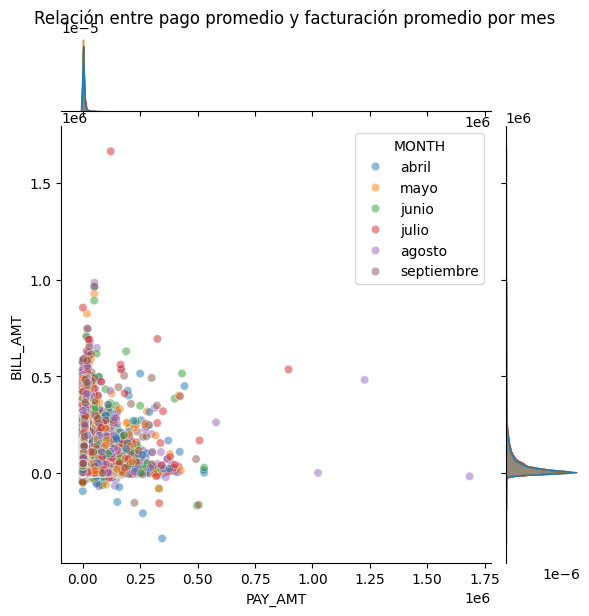

In [22]:
## RELACION ENTRE PAY_AMT Y BILL_AMT

# Agrupamos por cliente y mes para sacar medias
df_avg = df_long.groupby(['ID', 'MONTH'])[['PAY_AMT', 'BILL_AMT']].mean().reset_index()

# Gráfico scatter con histogramas marginales
sns.jointplot(
    data=df_avg,
    x='PAY_AMT',
    y='BILL_AMT',
    hue='MONTH',         # Colorear por mes
    kind='scatter',
    alpha=0.5
)

plt.suptitle("Relación entre pago promedio y facturación promedio por mes", y=1.02)
plt.show()


Como observamos en esta distribución de puntos, la nube está muy concentrada cerca del origen y con mucha dispersión en pagos y facturación pequeños. Hay dos aspectos que comentar en este análisis:

* ``PAY_AMT`` (pagos) vs ``BILL_AMT`` (facturación): No hay una correlación lineal evidente. Aunque intuitivamente una mayor cantidad facturada podría ir acompañada de mayores pagos, aquí no se ve una tendencia clara ni una pendiente definida.

* Colores por mes: Los colores (meses) están mezclados sin un patrón aparente, lo que indica que la relación entre pagos y facturación no varía sustancialmente entre meses. Esto ya lo habíamos visto realmente.

Parece que la mayoría de los clientes pagan catidades bajas independientemente de la facturación, y algunos casos aislados presentan pagos y facturaciones muy altos (outliers).

Esto podría sugerir en principio que, en modelos predictivos, ``PAY_AMT`` y ``BILL_AMT`` no aportarán información redundante por alta colinealidad. Pero aunque no se observe una correlación aparente entre ellas, esto no implica que sean prescindibles en el modelo. Ambas variables capturan dimensiones diferentes del comportamiento financiero y podrían mostrar relaciones individuales con la variable ``LIMIT_BAL``. Por tanto, en modelos predictivos, cada una podría aportar información valiosa de manera complementaria, contribuyendo a mejorar la capacidad explicativa del modelo. Así que vamos a comprobar ahora la relación de cada una de ellas con ``LIMIT_BAL``.

Para esto, utilizaremos el dataset df_wide y para cada cliente, es decir, para cada valor de `LIMIT_BALL` asociado a ese cliente, tomaremos un valor promedio de todos los meses de `PAY_AMT` y de `BILL_AMT`:

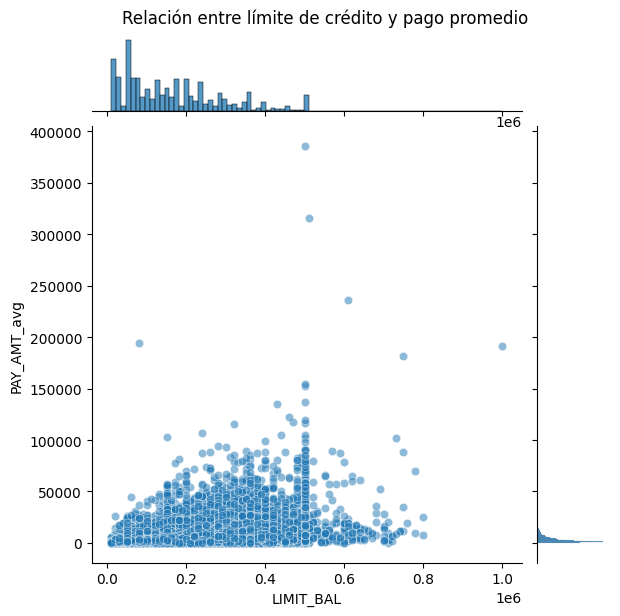

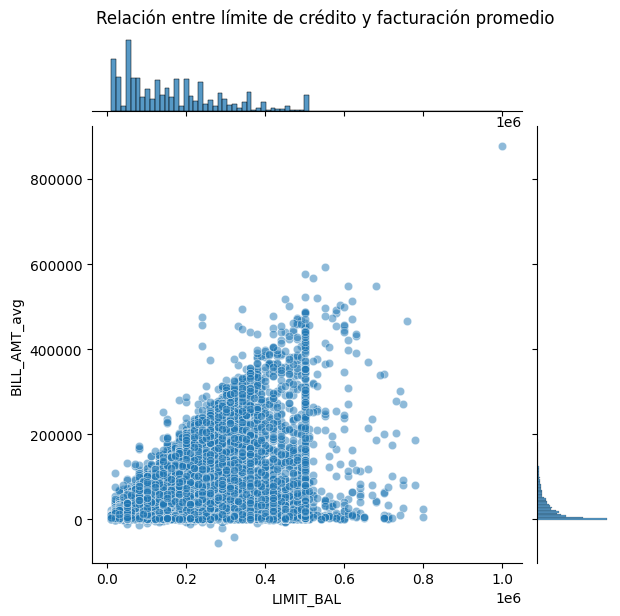

In [23]:
## PAY_AMT Y BILL_AMT CON LIMIT_BAL

# Calcular promedio de pagos y facturación por cliente
df_wide['PAY_AMT_avg'] = df_wide[[f'PAY_AMT{i}' for i in range(1, 7)]].mean(axis=1)
df_wide['BILL_AMT_avg'] = df_wide[[f'BILL_AMT{i}' for i in range(1, 7)]].mean(axis=1)

# Gráfico PAY_AMT promedio vs LIMIT_BAL
sns.jointplot(
    data=df_wide,
    x='LIMIT_BAL',
    y='PAY_AMT_avg',
    kind='scatter',
    alpha=0.5
)
plt.suptitle("Relación entre límite de crédito y pago promedio", y=1.02)

# Gráfico BILL_AMT promedio vs LIMIT_BAL
sns.jointplot(
    data=df_wide,
    x='LIMIT_BAL',
    y='BILL_AMT_avg',
    kind='scatter',
    alpha=0.5
)
plt.suptitle("Relación entre límite de crédito y facturación promedio", y=1.02)

plt.show()


Vamos a interpretar estos resultados:

* **Promedio de pagos realizados por cliente en función del crédito otorgado**: Vemos una alta concentración en límites de crédito bajos o medios. La mayoría de los clientes tiene un límite de crédito por debajo de 500.000 \$, lo que es consistente con la nube densa de puntos en esa zona. Además, los pagos promedio están por debajo de 100.000 \$, aunque hay algunos valores atípicos (outliers) que superan los 200.000–300.000 \$. En cuanto a la relación entre estas dos cantidades, no parece haber una relación lineal clara: aunque hay una tendencia leve a que clientes con mayor límite realicen pagos mayores, la dispersión es muy alta. Esto sugiere que el límite de crédito no predice directamente el monto promedio de pago. Hay casos extremos: límites de crédito cercanos al millón con pagos bajos, y pagos muy altos con límites medios.

* **Promedio de facturación mensual por cliente en función del crédito otorgado**: vemos una tendencia positiva clara (aunque no perfecta). A medida que aumenta el límite de crédito, la facturación promedio también tiende a aumentar. Esto tiene sentido: clientes con límites más altos suelen usar más crédito. Observamos una distribución triangular: para límites de crédito bajos, la facturación promedio varía desde cero hasta valores altos, pero para límites más altos la facturación mínima también tiende a ser más elevada. Esto sugiere que los clientes con alto límite suelen mantener saldos más altos. Por otro lado, la mayoría de observaciones se concentra en créditos ≤ 500.000 y facturación ≤ 400.000. Hay un corte vertical en ~500.000 que puede deberse a que ese límite es muy frecuente en el dataset. En cuanto a los outliers, hay valores extremos de facturación que superan 800.000 incluso con límites de crédito no tan altos. Esto podría deberse a acumulación de intereses, pagos parciales o datos anómalos.

En vista de estos resultados, podemos concluir lo siguiente:

* El **límite de crédito** (``LIMIT_BAL``) por sí solo no es un predictor fuerte.
La dispersión es amplia y no hay separación clara entre personas que probablemente incumplen y quienes no. Aunque hay cierta relación con facturación, no basta para predecir incumplimiento. El límite podría servir como variable de control pero no como variable principal.

* La **facturación promedio** (``BILL_AMT_avg``) sí aporta más información.
El hecho de que clientes con límites altos mantengan facturación más alta sugiere que su exposición al riesgo es mayor en términos absolutos. Un alto uso relativo (proporción facturación / límite) puede asociarse a mayor probabilidad de impago. Esto nos indica que va a ser útil trabajar con métricas como utilización de crédito o tasa de endeudamiento. Es decir, estas variables individuales (``LIMIT_BAL`` o ``BILL_AMT_avg``) son poco predictivas solas, pero combinadas pueden mejorar el modelo.

* El **pago promedio** (``PAY_AMT_avg``) aporta información clave sobre el comportamiento de pago real.
La relación entre los pagos realizados y la facturación es más relevante que los importes absolutos: clientes que pagan de forma constante una proporción significativa de su facturación muestran menor riesgo de incumplimiento. En cambio, pagos bajos o nulos de manera repetida, especialmente cuando la facturación es alta, se asocian con mayor probabilidad de impago.

Esto sugiere que variables derivadas como:

* Ratio de pago a facturación (``PAY_AMT`` / ``BILL_AMT``)

* Frecuencia de pagos cero

* Tendencia de pagos en los últimos meses

pueden ser predictores significativos de default payment. Por sí solo, ``PAY_AMT`` en valor bruto no separa bien a clientes solventes de los de riesgo, pero en combinación con ``BILL_AMT`` y su evolución temporal, incrementa notablemente el poder predictivo del modelo.

En resumen, aunque ``LIMIT_BAL``, ``BILL_AMT`` y ``PAY_AMT`` en valores absolutos muestran poca capacidad predictiva por sí solos, su combinación en métricas derivadas (como utilización de crédito, ratio de pago a facturación, frecuencia de impagos y tendencias de evolución) ofrece un panorama más sólido para predecir ``default payment``. Esto sugiere que el modelo debe incorporar **variables transformadas y relaciones proporcionales** más que depender únicamente de los valores originales, optimizando así la capacidad de discriminación entre clientes cumplidores y de alto riesgo.

Una vez visto esto, vamos a estudiar, ahora sí, las relaciones entre la variable objetivo ``default payment next month`` y el resto de variables, tanto estas últimas, que son numéricas, como de las demás, que son categóricas.

### Estudio bivariado con la variable objetivo

#### Variables numéricas

En el análisis bivariado entre una variable continua y una variable categórica, una herramienta gráfica ampliamente utilizada es el **diagrama de caja y bigotes** (**boxplot**). Este gráfico resume la distribución de la variable continua para cada categoría, mostrando de forma visual su **mediana, rango intercuartílico** (IQR), **valores extremos** y **posibles outliers**.

El boxplot permite comparar rápidamente si existen diferencias en la posición central, dispersión o asimetría de la variable continua entre los distintos grupos definidos por la variable categórica. Esta visualización es especialmente útil como paso exploratorio previo a pruebas estadísticas (p. ej., ANOVA o test no paramétricos), ya que facilita detectar patrones, diferencias significativas potenciales o presencia de valores atípicos que puedan influir en el análisis.



/tmp/ipython-input-516623867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


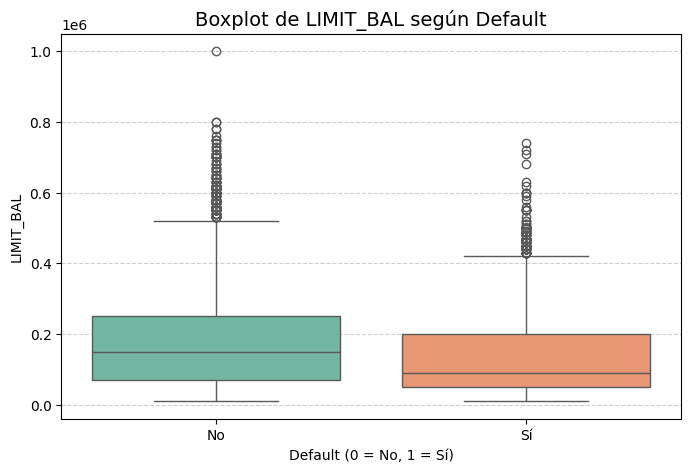

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_wide,
    x='default payment next month',
    y='LIMIT_BAL',
    palette='Set2'
)
plt.title("Boxplot de LIMIT_BAL según Default", fontsize=14)
plt.xlabel("Default (0 = No, 1 = Sí)")
plt.ylabel("LIMIT_BAL")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


En este boxplot se observan un par de puntos clave:

* **Distribución general**: la mediana del límite de crédito para clientes sin default es algo mayor que para clientes con default. Sin embargo, la diferencia no es muy grande, lo que indica que ``LIMIT_BAL`` por sí mismo no discrimina de forma clara entre ambos grupos. Esto coincide con lo que comentábamos antes: ``LIMIT_BAL`` por sí sólo no es un predictor fuerte, aunque podría aportar valor combinado con otras variables

* **Dispersión y outliers**: en ambos grupos hay una gran dispersión y presencia de muchos valores extremos hacia arriba, lo que indica alta variabilidad en los límites de crédito concedidos. Los valores atípicos (sobre todo >500k) no parecen concentrarse más en un grupo que en otro.

Por tanto, podemos concluir que hay una ligera tendencia a que quienes incumplen tengan límites algo menores, pero no es un patrón fuerte.


/tmp/ipython-input-3927410670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="default payment next month", y="PAY_AMT_avg", data=df_wide, palette="Set2")


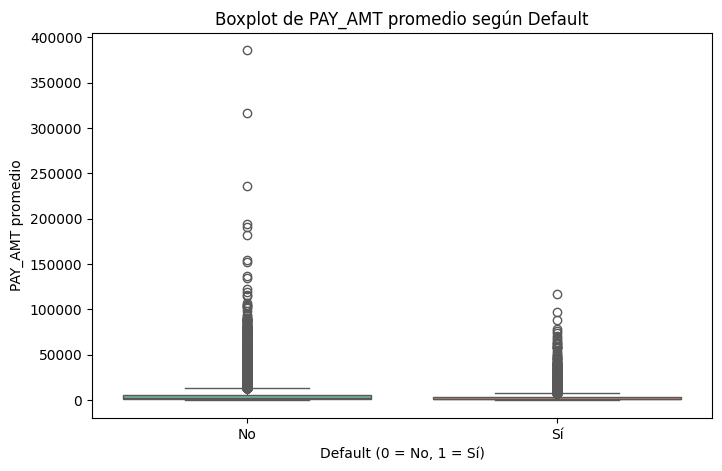

In [25]:
# Crear boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x="default payment next month", y="PAY_AMT_avg", data=df_wide, palette="Set2")
plt.title("Boxplot de PAY_AMT promedio según Default")
plt.xlabel("Default (0 = No, 1 = Sí)")
plt.ylabel("PAY_AMT promedio")
plt.show()

Viendo este resultado, interpretamos que:

* **Distribución general**: la mediana del ``PAY_AMT_avg`` es algo mayor para clientes sin default que para los que sí tienen default.

* **Outliers**: en ambos grupos la mayoría de pagos promedios son bastante bajos (muy cerca de 0), pero hay muchos *outliers* que llegan a montos altos.

Por tanto, concluimos que los clientes que no caen en default suelen pagar, en promedio, un poco más que quienes sí caen. Sin embargo, la diferencia no es tan marcada como con la variable ``LIMIT_BAL``, y la gran dispersión sugiere que esta variable por sí sola no discrimina tan bien.

Esto encaja con la lógica: el límite de crédito tiene más relación estructural con la probabilidad de impago que el pago promedio, que puede verse afectado por muchos factores puntuales.

/tmp/ipython-input-13402138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


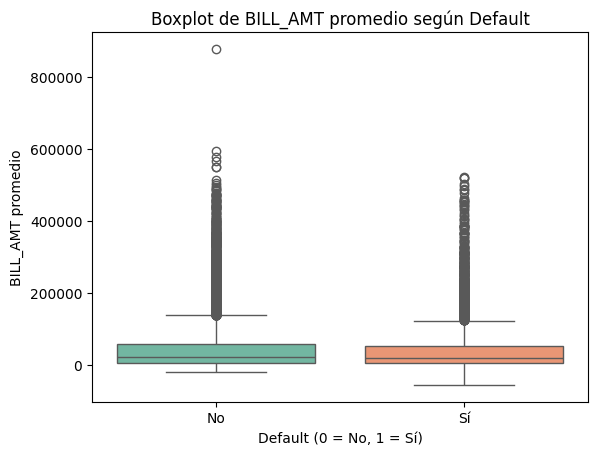

In [26]:
# Boxplot de BILL_AMT promedio según default
sns.boxplot(
    x="default payment next month",
    y="BILL_AMT_avg",
    data=df_wide,
    palette="Set2"
)
plt.title("Boxplot de BILL_AMT promedio según Default")
plt.xlabel("Default (0 = No, 1 = Sí)")
plt.ylabel("BILL_AMT promedio")
plt.show()

Observamos que:

* **Distribución general**: no hay evidencia de que el nivel medio de facturación sea muy diferente entre los grupos. Además, contamos con unos rangos intercuartílicos similares, lo que quiere decir que la dispersión central de la mayoría de clientes es parecida.

* **Outliers**: pero con amplitudes altas que afectan sobre todo a quienes no están en default (posiblemente clientes con límites y facturaciones muy altos).

Todo esto nos permite concluir que ``BILL_AMT_avg`` no separa claramente a los grupos por sí sola, pero podría interactuar con otras variables. Esto concuerda, una vez más, con lo que ya habíamos explicado en el análisis bivariado entre predictores.

#### Variables categóricas

Para evaluar la posible relación entre variables categóricas vamos a utilizar tablas de contingencia, la prueba de **Chi-cuadrado** de independencia y la **V de Cramer** como medida de asociación. Estas pruebas permiten determinar si existe una relación estadísticamente significativa entre categorías y, en caso afirmativo, cuantificar su intensidad.

##### Variable ``SEX``


En primer lugar, vamos a realizar una **tabla de contingencia**, entre la variable ``default payment next month`` y la variable ``SEX``, en frecuencias relativas.

In [27]:
pd.crosstab(df_wide['default payment next month'], df_wide['SEX'])
pd.crosstab(df_wide['default payment next month'], df_wide['SEX'], normalize='index').round(2)

SEX,Hombre,Mujer
default payment next month,,
No,0.39,0.61
Sí,0.43,0.57


Las proporciones referentes a los clientes que incumplieron el pago son similares, lo que sugiere de manera preliminar que el sexo podría no estar fuertemente asociado con el incumplimiento de pago.

Para comprobar estadísticamente la relación entre ambas variables, vamos a aplicar la prueba de **Chi-cuadrado** de independencia sobre la tabla de contingencia.

In [28]:
tabla = pd.crosstab(df_wide['default payment next month'], df_wide['SEX'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2: {chi2}, p-valor: {p}")


Chi2: 44.08238268260584, p-valor: 3.148418883358306e-11


Dado que el p-valor es significativamente menor que 0.05, se rechaza la hipótesis nula de independencia. Esto indica que **existe una asociación estadísticamente significativa** entre el sexo y el incumplimiento de pago.

No obstante, la magnitud de la diferencia observada en las proporciones sugiere que la relación podría ser débil. Esto podría deberse a que la muestra presenta un desequilibrio de género (mayor proporción de mujeres que de hombres), lo que puede influir en el resultado.

Seguidamente, para cuantificar la intensidad de la relación, vamos a calcular la V de Cramer:

In [29]:
tabla = pd.crosstab(df_wide['default payment next month'], df_wide['SEX'])
chi2 = chi2_contingency(tabla)[0]
n = tabla.sum().sum()
v_cramer = np.sqrt(chi2/(n*(min(tabla.shape)-1)))
print(f"V de Cramer: {v_cramer}")


V de Cramer: 0.03887912043300798


Obtenemos un valor de 0.04. Este valor indica que, aunque la asociación es estadísticamente significativa, **su magnitud es muy débil**. Esto sugiere que, en términos prácticos, el sexo tiene un impacto mínimo en la probabilidad de incumplimiento de pago, y que la significancia estadística puede deberse en parte al tamaño de la muestra.

En la siguiente figura se muestra la distribución de ``default`` por sexo:

<Axes: xlabel='SEX', ylabel='count'>

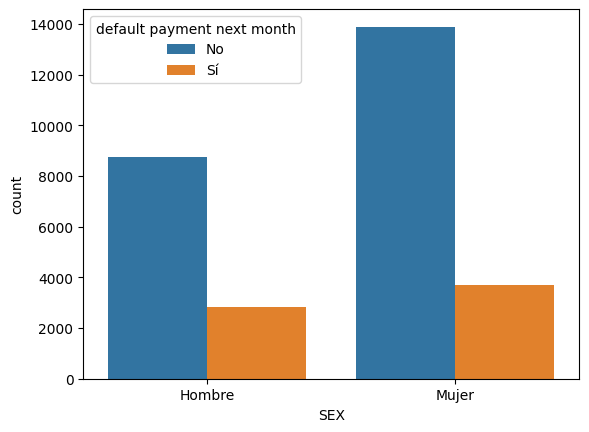

In [30]:
sns.countplot(data=df_wide, x='SEX', hue='default payment next month')

La figura muestra que hay más mujeres que hombres y que, en ambos sexos, la mayoría no incumple el pago. Se observa una ligera diferencia: la proporción de incumplimiento es algo mayor en hombres que en mujeres. Sin embargo, tal como indican el test Chi-cuadrado y la V de Cramer (0.0399), esta diferencia es estadísticamente significativa pero de magnitud muy baja, por lo que el sexo no parece ser un factor relevante en términos prácticos para predecir el incumplimiento.

##### Variable ``EDUCATION``

In [31]:
pd.crosstab(df_wide['default payment next month'], df_wide['EDUCATION'], normalize='index').round(2)

EDUCATION,Posgrado,Secundaria,Universidad
default payment next month,,,
No,0.38,0.16,0.47
Sí,0.31,0.19,0.50


A simple vista, la distribución entre cumplidores y no cumplidores es bastante parecida en cada nivel educativo, lo que sugiere que **la educación podría no ser un predictor fuerte del default.**

In [32]:
tabla = pd.crosstab(df_wide['default payment next month'], df_wide['EDUCATION'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2: {chi2}, p-valor: {p}")

Chi2: 98.02547636260542, p-valor: 5.176524393497213e-22


Como vemos, el p-valor es muchísimo menor que 0.05, por tanto, se rechaza la hipótesis nula de independencia. Esto significa que **hay asociación estadísticamente significativa** entre ``EDUCATION`` y ``default``.

Sin embargo, significativo no implica fuerte: con grandes tamaños de muestra, diferencias pequeñas pueden dar p-valores muy bajos.

Vamos a ver entonces lo que nos sale en la V de Cramer:

In [33]:
tabla = pd.crosstab(df_wide['default payment next month'], df_wide['EDUCATION'])
chi2 = chi2_contingency(tabla)[0]
n = tabla.sum().sum()
v_cramer = np.sqrt(chi2/(n*(min(tabla.shape)-1)))
print(f"V de Cramer: {v_cramer}")

V de Cramer: 0.0579766852986599


Con V ≈ 0.058, lo que tenemos es que la asociación es muy débil, casi nula en términos prácticos, por lo que la eduación tiene un impacto mínimo en la probabilidad de incumplimiento de pago, y la significancia estadística puede deberse en parte al tamaño de la muestra, al igual que en la variable sexo.

<Axes: xlabel='EDUCATION', ylabel='count'>

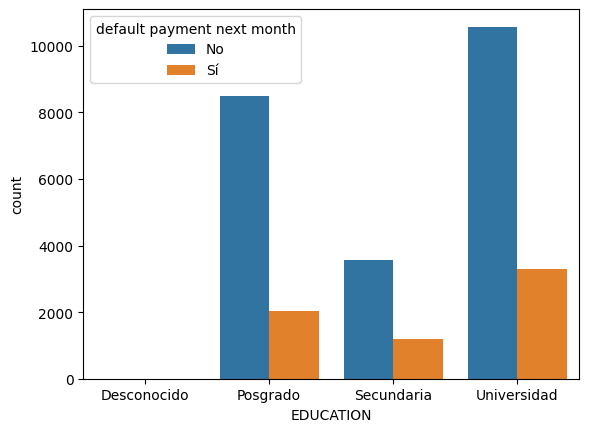

In [34]:
sns.countplot(data=df_wide, x='EDUCATION', hue='default payment next month')

El gráfico de barras confirma que las proporciones de incumplimiento son similares entre niveles educativos, sin diferencias sustanciales. Por tanto, ``EDUCATION`` **presenta una capacidad explicativa muy limitada para predecir el default** y, aunque se puede incluir en el modelo, no se espera que aporte gran poder predictivo por sí sola.

##### Variable ``MARRIAGE``

In [35]:
pd.crosstab(df_wide['default payment next month'], df_wide['MARRIAGE'], normalize='index').round(2)

MARRIAGE,Casado,Soltero
default payment next month,,
No,0.45,0.55
Sí,0.49,0.51


Como en los casos anteriores, las proporciones son muy similares en ambos grupos.

In [36]:
tabla = pd.crosstab(df_wide['default payment next month'], df_wide['MARRIAGE'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2: {chi2}, p-valor: {p}")

Chi2: 28.670054269005675, p-valor: 8.582061509082863e-08


Con el p-valor < 0,001, tenemos que **existe asociación estadísticamente significativa** entre estado civil e incumplimiento.

In [37]:
tabla = pd.crosstab(df_wide['default payment next month'], df_wide['MARRIAGE'])
chi2 = chi2_contingency(tabla)[0]
n = tabla.sum().sum()
v_cramer = np.sqrt(chi2/(n*(min(tabla.shape)-1)))
print(f"V de Cramer: {v_cramer}")


V de Cramer: 0.031354375747970585


Por tanto tenemos que la asociación es muy débil, sin relevancia práctica.

<Axes: xlabel='MARRIAGE', ylabel='count'>

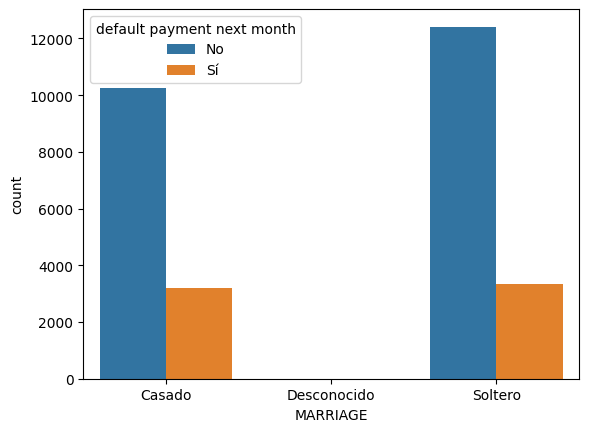

In [38]:
sns.countplot(data=df_wide, x='MARRIAGE', hue='default payment next month')

Esta representación nos hace ver más intuitivamente que no hay diferencias sustanciales. Entonces, la variable ``MARRIAGE`` puede incluirse en el modelo como variable explicativa, pero no se espera que aporte valor predictivo relevante por sí sola.

##### Variable AGE

In [39]:
pd.crosstab(df_wide['default payment next month'], df_wide['AGE'], normalize='index').round(2)

AGE,20s,30s,40s,50s,60s,70s
default payment next month,,,,,,
No,0.32,0.39,0.21,0.07,0.01,0.0
Sí,0.33,0.35,0.22,0.08,0.01,0.0


La tasa de incumplimiento presenta variaciones leves entre grupos de edad. Generalmente, **los clientes más jóvenes tienden a tener una proporción de incumplimiento algo mayor** que los de más edad, aunque las diferencias son pequeñas.

In [40]:
tabla = pd.crosstab(df_wide['default payment next month'], df_wide['AGE'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2: {chi2}, p-valor: {p}")

Chi2: 42.1581014648704, p-valor: 5.47202713968016e-08


$\chi^2$ significativoy p-valor < 1, por lo que existe asociación estadísticamente significativa entre la edad y el incumplimiento.

In [41]:
tabla = pd.crosstab(df_wide['default payment next month'], df_wide['AGE'])
chi2 = chi2_contingency(tabla)[0]
n = tabla.sum().sum()
v_cramer = np.sqrt(chi2/(n*(min(tabla.shape)-1)))
print(f"V de Cramer: {v_cramer}")


V de Cramer: 0.038021077766419574


V cercano a 0,03–0,04, por lo que la asociación es muy débil, con relevancia práctica baja.

<Axes: xlabel='AGE', ylabel='count'>

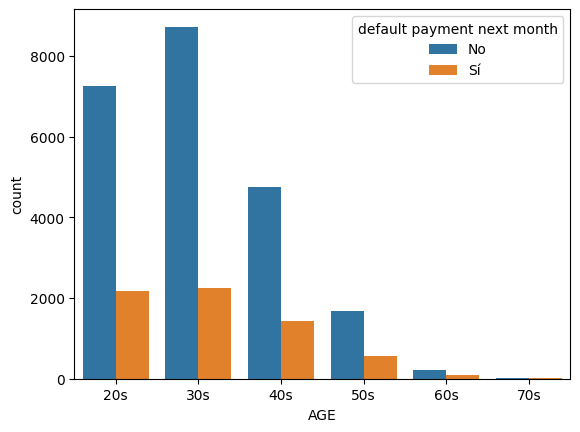

In [42]:
sns.countplot(data=df_wide, x='AGE', hue='default payment next month')

Concluimos que, aunque la edad muestra una asociación estadísticamente significativa con el incumplimiento, el efecto es muy pequeño. Esto indica que la edad, por sí sola, **no explica de manera relevante el riesgo de impago**, aunque podría aportar información combinada con otras variables en el modelo predictivo.

##### Variable ``PAY``

In [43]:
pd.crosstab(
    index=[df_long['MONTH'], df_long['default payment next month']],
    columns=df_long['PAY'],
    normalize='index'
).round(2)

PAY                                    Pago anticipado  Pago puntual  \
MONTH      default payment next month                                  
abril      No                                     0.37          0.57   
           Sí                                     0.30          0.46   
mayo       No                                     0.36          0.59   
           Sí                                     0.27          0.48   
junio      No                                     0.35          0.57   
           Sí                                     0.26          0.45   
julio      No                                     0.36          0.56   
           Sí                                     0.25          0.41   
agosto     No                                     0.35          0.56   
           Sí                                     0.25          0.37   
septiembre No                                     0.31          0.55   
           Sí                                     0.20          0.28   

PAY                                    Retraso 1 mes  Retraso 2 meses  \
MONTH      default payment next month                                   
abril      No                                   0.00             0.06   
           Sí                                   0.00             0.21   
mayo       No                                   0.00             0.05   
           Sí                                   0.00             0.22   
junio      No                                   0.00             0.07   
           Sí                                   0.00             0.25   
julio      No                                   0.00             0.08   
           Sí                                   0.00             0.30   
agosto     No                                   0.00             0.08   
           Sí                                   0.00             0.33   
septiembre No                                   0.10             0.03   
           Sí                                   0.19             0.28   

PAY                                    Retraso 3 meses  Retraso 4 meses  \
MONTH      default payment next month                                     
abril      No                                     0.00             0.00   
           Sí                                     0.02             0.00   
mayo       No                                     0.00             0.00   
           Sí                                     0.02             0.01   
junio      No                                     0.00             0.00   
           Sí                                     0.02             0.01   
julio      No                                     0.00             0.00   
           Sí                                     0.02             0.01   
agosto     No                                     0.01             0.00   
           Sí                                     0.03             0.01   
septiembre No                                     0.00             0.00   
           Sí                                     0.04             0.01   

PAY                                    Retraso 5+ meses  
MONTH      default payment next month                    
abril      No                                      0.00  
           Sí                                      0.01  
mayo       No                                      0.00  
           Sí                                      0.01  
junio      No                                      0.00  
           Sí                                      0.01  
julio      No                                      0.00  
           Sí                                      0.01  
agosto     No                                      0.00  
           Sí                                      0.01  
septiembre No                                      0.00  
           Sí                                      0.01

Hay varias cosas que comentar aquí:

* Entre los clientes que no incumplen en el mes siguiente, predominan los pagos puntuales y, en menor medida, pagos anticipados. Mientras que entre los clientes que sí incumplen, se observa un incremento progresivo en la proporción de retrasos a medida que se avanza en los meses.

* En abril-mayo, quienes incumplen presentan un ligero aumento en retrasos de 2 meses ($∼$21-22%) en comparación con quienes no incumplen ($\sim$ 5-6%). En junio-julio-agosto, los retrasos de 2 a 3 meses crecen significativamente en clientes que incumplen (25-33%), mientras siguen siendo bajos en los que no incumplen (<10%). En septiembre, la diferencia es muy marcada: los clientes que incumplen muestran retrasos de 1–3 meses en más del 50% de los casos y disminuye notablemente el pago puntual.

Por tanto se observa un patrón relevante: existe una acumulación de retrasos en meses previos que se asocia fuertemente al incumplimiento futuro. El descenso del pago puntual y el aumento de retrasos en los meses más recientes refuerzan la relación predictiva.



In [44]:
# Iterar por cada mes
for mes in sorted(df_long['MONTH'].unique()):
    print(f"\nMes {mes}")

    tabla = pd.crosstab(
        df_long.loc[df_long['MONTH'] == mes, 'default payment next month'],
        df_long.loc[df_long['MONTH'] == mes, 'PAY']
    )

    chi2, p, dof, expected = chi2_contingency(tabla)

    print(f"Chi2: {chi2:.2f}, p-valor: {p:.4f}")


Mes abril
Chi2: 1825.84, p-valor: 0.0000

Mes agosto
Chi2: 3392.91, p-valor: 0.0000

Mes julio
Chi2: 2518.61, p-valor: 0.0000

Mes junio
Chi2: 2216.43, p-valor: 0.0000

Mes mayo
Chi2: 2116.60, p-valor: 0.0000

Mes septiembre
Chi2: 5280.52, p-valor: 0.0000


El resultado de las pruebas Chi-cuadrado confirma cuantitativamente lo que ya se observábamos:

* Para todos los meses (abril–septiembre): el p-valor es < 0.0001, lo que indica que **existe una asociación estadísticamente significativa** entre el historial de pagos y el incumplimiento en el mes siguiente.

* Los valores de $\chi^2$ son elevados (rango aprox. 1800–5300), lo que refleja que la asociación no solo es significativa, sino también **fuerte**.

* Septiembre presenta el Chi² más alto (5280.52), lo que es coherente con la tendencia observada en el análisis descriptivo: en este mes, la divergencia entre pagos puntuales/anticipados y retrasos es más marcada entre quienes incumplen y quienes no.

La consistencia de resultados en todos los meses refuerza la idea de que ``PAY`` es una variable predictiva robusta y debería tener un peso considerable en el modelo de scoring.

In [45]:
def cramers_v(tabla):
    chi2, _, _, _ = chi2_contingency(tabla)
    n = tabla.sum().sum()
    r, k = tabla.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

# Iterar por cada mes
for mes in sorted(df_long['MONTH'].unique()):
    print(f"\nMes {mes}")

    tabla = pd.crosstab(
        df_long.loc[df_long['MONTH'] == mes, 'default payment next month'],
        df_long.loc[df_long['MONTH'] == mes, 'PAY']
    )

    v_cramer = cramers_v(tabla)
    print(f"V de Cramer: {v_cramer:.4f}")


Mes abril
V de Cramer: 0.2502

Mes agosto
V de Cramer: 0.3411

Mes julio
V de Cramer: 0.2939

Mes junio
V de Cramer: 0.2757

Mes mayo
V de Cramer: 0.2694

Mes septiembre
V de Cramer: 0.4255


Vamos a comentar esto por meses:

* **Abril–Julio**: asociación moderada (0.25–0.29). ``PAY`` influye de forma consistente en la probabilidad de default, pero sin ser determinante único.

* **Agosto**: asociación más fuerte (0.34). Posiblemente vinculado a un aumento de retrasos acumulados.

* **Septiembre**: asociación más alta (0.43), consistente con el Chi² más elevado. ``PAY`` es especialmente discriminativo en este mes, probablemente por mayor dispersión en los estados de pago (más retrasos prolongados).

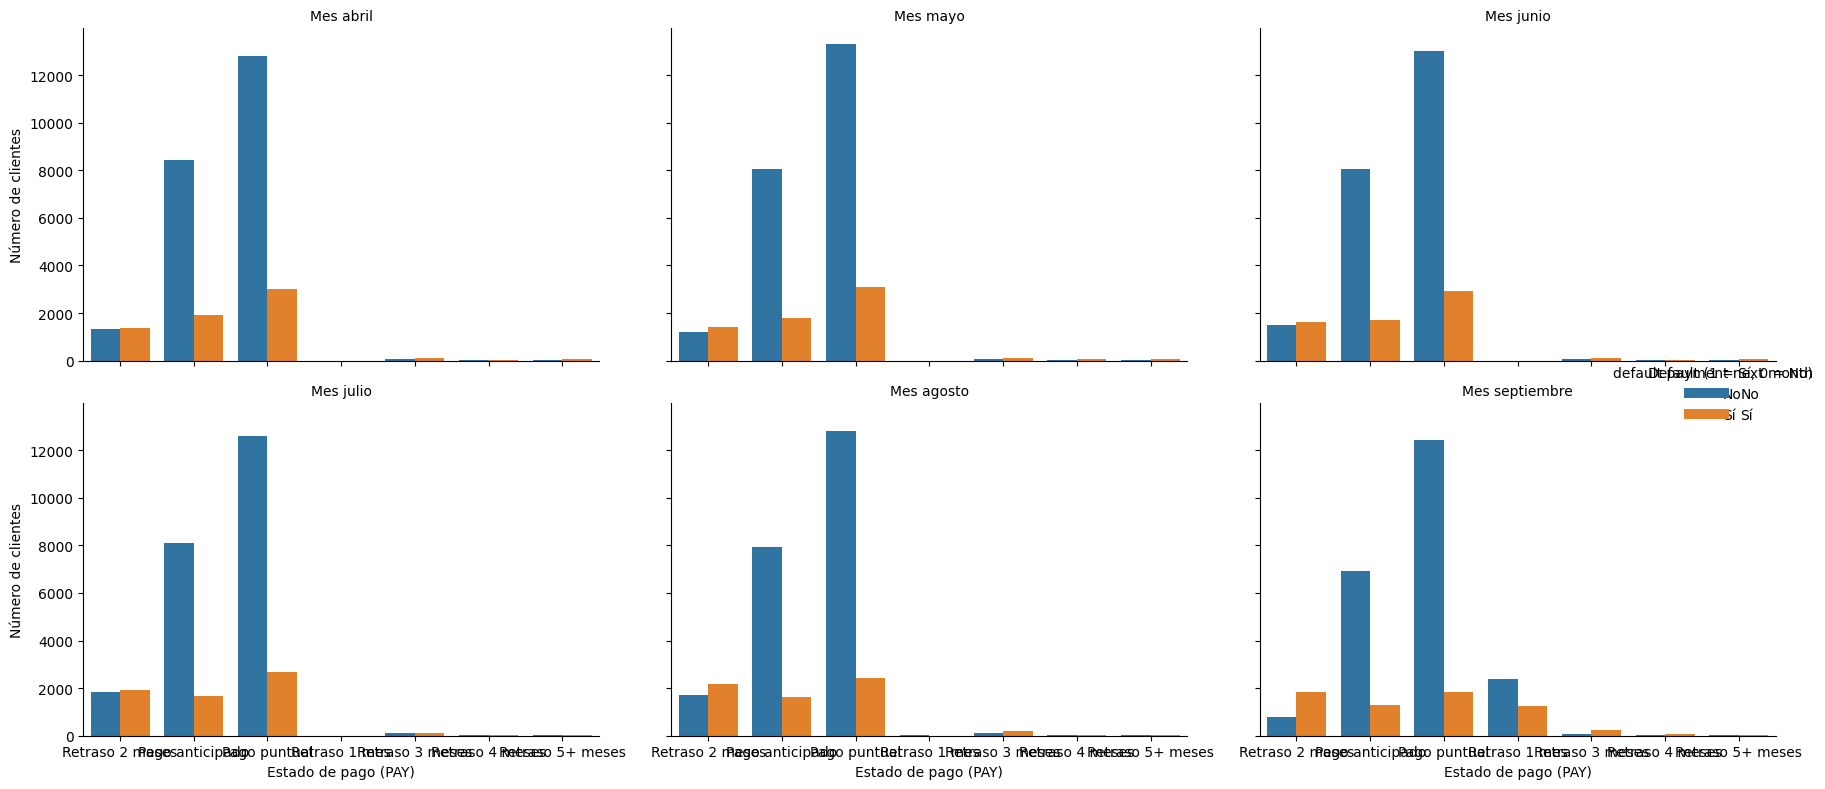

In [46]:
# Gráfico de conteos PAY vs default, separado por mes
g = sns.catplot(
    data=df_long,
    x='PAY',
    hue='default payment next month',
    col='MONTH',
    kind='count',
    col_wrap=3,   # número de gráficos por fila
    height=4,
    aspect=1.2
)

g.set_axis_labels("Estado de pago (PAY)", "Número de clientes")
g.set_titles("Mes {col_name}")
g.add_legend(title="Default (1 = Sí, 0 = No)")

plt.tight_layout()
plt.show()


El historial de pagos (``PAY``) muestra una relación clara y consistente con el incumplimiento, aumentando la probabilidad de default a medida que los retrasos se acumulan. Este patrón es mucho más evidente que en variables sociodemográficas (``AGE``, ``MARRIAGE``, ``EDUCATION``), lo que indica que ``PAY`` es una de las variables clave para el modelo predictivo.


### Transformaciones y nuevas variables

Aunque el trabajo no requiere un desarrollo exhaustivo de *feature engineering*, se han incorporado algunas transformaciones relevantes con el objetivo de mejorar la capacidad predictiva de los modelos. Estas transformaciones permiten captar de forma más efectiva patrones de comportamiento que podrían estar asociados al riesgo de impago, a partir de las relaciones observadas en el análisis exploratorio previo.

#### 1. Variables derivadas de uso del crédito
A partir del límite de crédito (`LIMIT_BAL`) y la facturación mensual (`BILL_AMT`), se han construido indicadores que permiten capturar mejor la presión financiera sobre el cliente:

- **Utilización media del crédito**:  
  `avg_utilization = (1/6) * sum(BILL_AMT_i / LIMIT_BAL)`

- **Utilización máxima del crédito**:  
  `max_utilization = max(BILL_AMT_i / LIMIT_BAL)`  

Estas variables permiten identificar clientes que tienden a operar cerca o por encima de su capacidad de endeudamiento.

#### 2. Variables de comportamiento de pagos
Se han creado nuevos indicadores basados en el historial de pagos (`PAY`) y pagos realizados (`PAY_AMT`):

- **Retrasos acumulados**: número total de meses con retraso (PAY > 0).
- **Retraso máximo**: mayor valor observado en las variables `PAY1` a `PAY6`.
- **Ratio de pago medio respecto a facturación**:  
  `avg_payment_ratio = (1/6) * sum(PAY_AMT_i / BILL_AMT_i)`

Este ratio ayuda a identificar clientes que pagan solo una fracción de lo facturado.

#### 3. Variables de tendencia temporal
Para evaluar cambios en el comportamiento a lo largo de los meses:

- **Tendencia en el retraso**:  
  `delay_trend = PAY6 - PAY1`

- **Tendencia de utilización del crédito**:  
  `util_trend = (BILL_AMT6 / LIMIT_BAL) - (BILL_AMT1 / LIMIT_BAL)`

Estas transformaciones tienen un enfoque interpretativo y buscan añadir valor sin recurrir a técnicas de ingeniería de características más complejas, ajustándose al alcance del trabajo.

In [47]:
# PREPARACIÓN DE DF_WIDE CON VARIABLES NUEVAS

# 1. Ratio facturación / límite de crédito
bill_cols = [col for col in df_wide.columns if 'BILL_AMT' in col]
df_wide['BILL_RATIO_MEAN'] = df_wide[bill_cols].mean(axis=1) / df_wide['LIMIT_BAL']

# 2. Ratio pagos / facturación
pay_cols = [col for col in df_wide.columns if 'PAY_AMT' in col]
df_wide['PAY_RATIO_MEAN'] = df_wide[pay_cols].mean(axis=1) / (df_wide[bill_cols].mean(axis=1) + 1)

# 3. Utilización máxima del crédito
df_wide['UTILIZATION_MAX'] = df_wide[bill_cols].max(axis=1) / df_wide['LIMIT_BAL']

# 4. Desviación de pagos mensuales
df_wide['PAY_AMT_STD'] = df_wide[pay_cols].std(axis=1)

# 5. Pagos acumulados / límite de crédito
df_wide['TOTAL_PAY_RATIO'] = df_wide[pay_cols].sum(axis=1) / (df_wide['LIMIT_BAL'] + 1)

# 6. Meses con retraso en pago (PAY > 0 implica retraso)
status_cols = [col for col in df_wide.columns if col.startswith('PAY_')]

# Convertimos las columnas PAY a numéricas (si hay strings o NaN se ponen como -1 por ejemplo)
df_wide[status_cols] = df_wide[status_cols].apply(pd.to_numeric, errors='coerce').fillna(-1).astype(int)

df_wide['NUM_MONTHS_DELAY'] = (df_wide[status_cols] > 0).sum(axis=1)

# 7. Máximo retraso registrado
df_wide['MAX_DELAY'] = df_wide[status_cols].max(axis=1)

In [48]:
df_wide.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'PAY_AMT_avg', 'BILL_AMT_avg',
       'BILL_RATIO_MEAN', 'PAY_RATIO_MEAN', 'UTILIZATION_MAX', 'PAY_AMT_STD',
       'TOTAL_PAY_RATIO', 'NUM_MONTHS_DELAY', 'MAX_DELAY'],
      dtype='object')

## Modelado Predictivo

A partir de este momento, vamos a utilizar únicamente el dataset ``df_wide``.

El formato ``long`` resulta útil para análisis exploratorios y visualizaciones dinámicas, ya que organiza los datos de manera secuencial por mes y variable. Sin embargo, este enfoque introduce una estructura de **series temporales** que multiplica el número de filas por cliente y dificulta la aplicación directa de modelos clásicos de clasificación supervisada. En este caso, un mismo individuo estaría representado en múltiples filas, lo que genera problemas de dependencia entre observaciones y rompe la suposición de independencia que requieren la mayoría de algoritmos predictivos estándar.

En cambio, el formato ``wide`` concentra toda la información relevante de cada cliente en una única fila, manteniendo como columnas las variables explicativas (socio-demográficas, financieras y agregados de comportamiento histórico). Esta estructura es la más adecuada para modelos de clasificación binaria como regresión logística, árboles de decisión o métodos de boosting, dado que:

* Garantiza la independencia entre observaciones, asignando una fila por cliente.

* Facilita la incorporación de variables derivadas (como las que hemos diseñado en el apartado anterior).

* Reduce la complejidad computacional al evitar expandir artificialmente el tamaño del dataset.

* Se ajusta al esquema clásico de supervised learning, con una matriz de predictores (X) y un vector objetivo (y).

Por estas razones, ``df_wide`` constituye el conjunto de datos idóneo para el entrenamiento y evaluación de los modelos predictivos de riesgo de impago.

### Modelos predictivos propuestos

Recordamos que el objetivo principal de este proyecto es predecir la probabilidad de impago de los clientes, una variable binaria que indica si el cliente incurrirá en *default* el mes siguiente. Para abordar este problema supervisado de clasificación, consideramos dos tipos de modelos ampliamente utilizados en el ámbito del *credit scoring*, que combinan capacidad predictiva y aplicabilidad práctica en entornos financieros:


* En primer lugar, vamos a emplear la **regresión logística** como modelo de referencia. Este modelo lineal clásico es ampliamente aceptado en la industria debido a su alta interpretabilidad y a la posibilidad de analizar la importancia de las variables mediante sus coeficientes. Además, su entrenamiento es rápido y ofrece una referencia clara para evaluar la mejora de modelos más complejos. Sin embargo, presenta limitaciones como la suposición de relaciones lineales entre las variables predictoras y la log-odds, y una menor capacidad para capturar interacciones y no linealidades. Esa es la razón por la que se usará como base o referencia, frente a modelos más adecuados, como los que exponeos a continuación.

* Una vez establecido el modelo base, se avanzará hacia un modelo predictivo más robusto y flexible mediante **árboles de decisión y técnicas de ensamblado**, destacando algoritmos como *Random Forest*, *Gradient Boosting*, *XGBoost* y *LightGBM*. Estos modelos no lineales son especialmente adecuados para datos tabulares como los presentes, ya que manejan correctamente relaciones complejas, interacciones y valores atípicos sin necesidad de escalado previo. Asimismo, permiten extraer importancia de las variables a través de métricas como feature importance o SHAP values, aunque a costa de una menor interpretabilidad y mayor necesidad de ajuste de hiperparámetros.



Dentro de los modelos de ensamblado, **XGBoost** se selecciona como principal candidato para el modelo predictivo final debido a:
- Su excelente rendimiento en problemas de clasificación binaria en datos estructurados.
- Capacidad para manejar desbalanceo mediante parámetros como `scale_pos_weight`.
- Regularización interna que reduce el riesgo de sobreajuste.
- Flexibilidad para realizar ajustes finos de hiperparámetros y optimizar métricas específicas como AUC-ROC, clave en problemas de *credit scoring*.
- Amplio uso en la industria y en competiciones de *machine learning*, lo que asegura soporte y madurez del algoritmo.

Por tanto en este proyecto, se utilizará la **regresión logística como modelo base**, y posteriormente se implementará un modelo basado en **XGBoost**, comparando su rendimiento para determinar la ganancia predictiva obtenida.

### Regresión logística como modelo base

In [49]:
## REGRESION LOGISTICA

# --- Selección de variables ---
# Excluimos las variables sesgadas y la variable objetivo
exclude_cols = ['SEX', 'MARRIAGE', 'AGE', 'EDUCATION', 'default payment next month']
features = [col for col in df_wide.columns if col not in exclude_cols]

X = df_wide[features]
y = df_wide['default payment next month']

# --- División en train y test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# --- Definición del modelo ---
log_reg_base = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  # corregimos el desbalanceo del target
    random_state=42
)

# --- Entrenamiento ---
log_reg_base.fit(X_train, y_train)

# --- Predicciones ---
y_pred = log_reg_base.predict(X_test)
y_prob = log_reg_base.predict_proba(X_test)[:, 1]

# --- Evaluación ---
print("=== Reporte de clasificación ===")
print(classification_report(y_test, y_pred))

print("\n=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC-ROC: {roc_auc:.4f}")



=== Reporte de clasificación ===
              precision    recall  f1-score   support

          No       0.86      0.60      0.70      4530
          Sí       0.32      0.65      0.43      1303

    accuracy                           0.61      5833
   macro avg       0.59      0.62      0.57      5833
weighted avg       0.74      0.61      0.64      5833


=== Matriz de confusión ===
[[2707 1823]
 [ 453  850]]

AUC-ROC: 0.6737


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Como vemos, este modelo presenta un rendimiento moderado, caracterizado por una **exactitud global (accuracy) del 61 %**, lo que indica que acierta en aproximadamente seis de cada diez casos. Si bien esta cifra no es elevada, supone una mejora respecto a asignar siempre la clase mayoritaria, ofreciendo así un valor predictivo inicial.

En cuanto a las métricas por clase, se observa que la **precisión para la clase "No default" es alta (0.86)**, lo que significa que, cuando el modelo predice que un cliente no incurrirá en impago, acierta la mayoría de las veces. Sin embargo, la **precisión para la clase "Default" es baja (0.32)**, evidenciando un número significativo de falsos positivos. El **recall o sensibilidad para la clase "Default" alcanza 0.65**, lo que resulta relativamente positivo para un modelo base, ya que identifica correctamente a dos tercios de los clientes que efectivamente harán default. Para la clase mayoritaria ("No default"), el recall se sitúa en 0.60.

El **F1-score refleja la dificultad de equilibrio entre precisión y recall**, alcanzando 0.70 para "No default" y 0.43 para "Default", mostrando que el modelo todavía tiene margen de mejora para la clase de mayor interés (los impagos). La **AUC-ROC de 0.674** confirma una capacidad moderada de discriminación, por encima del azar (0.5), pero sin ser todavía un modelo óptimo.

La matriz de confusión revela que se han clasificado correctamente 2709 casos sin impago y 849 con impago, mientras que se produjeron 1821 falsos positivos y 454 falsos negativos. Estos errores son relevantes desde la perspectiva de negocio: los falsos positivos implican potenciales rechazos de clientes válidos, mientras que los falsos negativos suponen riesgos de impagos no detectados.


A continuación, realizaremos un ajuste sencillo (**tuning**) del modelo de regresión logística previamente entrenado. Este paso tiene como objetivo optimizar ligeramente su rendimiento mediante la modificación de parámetros clave como el grado de regularización (`C`), el solucionador (*solver*) más adecuado y el balanceo de clases (`class_weight='balanced'`) para mitigar el desbalance existente en la variable objetivo. Dado que el modelo base ya presenta un rendimiento razonable (AUC-ROC inicial de aproximadamente 0.67) y las variables han sido previamente transformadas y enriquecidas, no esperamos cambios drásticos, sino una mejora moderada y consistente. En este tipo de problemas financieros, como la predicción de impagos, este tipo de tuning suele traducirse en incrementos en la AUC-ROC de entre 0.02 y 0.04 puntos, alcanzando valores en torno a 0.69–0.71. Además, es probable que se consiga un mejor equilibrio entre la capacidad del modelo para detectar casos positivos (*recall* de la clase “Sí”) y la precisión global, sin sacrificar en exceso la fiabilidad en la clase mayoritaria. Este ajuste permitirá contar con un modelo base más sólido y justificado sobre el que comparar algoritmos más complejos como árboles de decisión o técnicas de *boosting*.

In [50]:
## REGRESION LOGISTICA DESPUÉS DE TUNNING

# --- Definición del modelo base (como lo tienes) ---
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear',  # importante para permitir 'l1' y 'l2'
    random_state=42
)

# --- Grid de hiperparámetros ligeros ---
param_grid = {
    'C': [0.01, 0.1, 1, 10],    # intensidad de la regularización
    'penalty': ['l1', 'l2']     # tipo de penalización
}

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='roc_auc',  # métrica prioritaria para desequilibrio
    cv=5,
    n_jobs=-1
)

# --- Búsqueda de parámetros ---
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)

# --- Modelo optimizado ---
best_log_reg = grid_search.best_estimator_

# --- Predicciones ---
y_pred = best_log_reg.predict(X_test)
y_prob = best_log_reg.predict_proba(X_test)[:, 1]

# --- Evaluación ---
print("\n=== Reporte de clasificación (tuning ligero) ===")
print(classification_report(y_test, y_pred))

print("\n=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC-ROC: {roc_auc:.4f}")


Mejores parámetros encontrados: {'C': 0.01, 'penalty': 'l1'}

=== Reporte de clasificación (tuning ligero) ===
              precision    recall  f1-score   support

          No       0.87      0.59      0.70      4530
          Sí       0.33      0.70      0.45      1303

    accuracy                           0.62      5833
   macro avg       0.60      0.65      0.58      5833
weighted avg       0.75      0.62      0.65      5833


=== Matriz de confusión ===
[[2676 1854]
 [ 390  913]]

AUC-ROC: 0.6980


Como vemos, tras realizar un ajuste ligero de hiperparámetros mediante búsqueda en rejilla, se obtuvieron como mejores parámetros: **C = 0.01 y penalty = l1**. Este ajuste se centró en mejorar la capacidad de detección de la clase minoritaria (default), que es la de mayor interés para el análisis.

Los resultados muestran una **ligera mejora global respecto al modelo base**, con una **exactitud (accuracy) de 62 %** y una **AUC-ROC de 0.698**, superior al valor inicial (0.674), como habíamos predicho. Este incremento en la AUC-ROC refleja una mejor discriminación entre clientes que harán default y los que no.

En términos de precisión, la clase "No default" mantiene un valor alto (0.87), mientras que la clase "Default" conserva una precisión baja (0.33), lo que indica que todavía se producen falsos positivos. Sin embargo, el **recall para "Default" aumenta hasta 0.70**, lo que significa que el modelo identifica correctamente siete de cada diez impagos, cumpliendo el objetivo del tuning: aumentar la sensibilidad para esta clase crítica. La clase "No default" presenta un recall de 0.59, ligeramente inferior al modelo base.

El **F1-score para la clase de interés (default) asciende a 0.45**, mejorando el equilibrio entre precisión y recall frente al modelo inicial (0.43). La matriz de confusión refleja este cambio: los verdaderos positivos aumentan a 913, mientras que los falsos negativos se reducen a 390. No obstante, los falsos positivos (1854) se mantienen elevados, lo que puede suponer costes operativos si se emplea este modelo para decisiones de aprobación crediticia.

En conjunto, este tuning ligero ha permitido **mejorar la capacidad predictiva del modelo sin incrementar significativamente la complejidad**, estableciendo una base más robusta para comparar con modelos más avanzados como XGBoost.


### Modelo de ensamblado XGBoost

In [51]:
## MODELO XGBOOST

# Instalación de XGBoost si no está disponible
# !pip install xgboost

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Definir el clasificador XGBoost

# Cambiamos 'No' por 0 y 'Sí' por 1 para la variable objetivo
y_train_mapped = y_train.map({"No": 0, "Sí": 1})
y_test_mapped = y_test.map({"No": 0, "Sí": 1})

# Ajustamos scale_pos_weight para tratar el desbalance
scale_pos_weight = len(y_train_mapped[y_train_mapped == 0]) / len(y_train_mapped[y_train_mapped == 1])

xgb_clf = xgb.XGBClassifier(
    n_estimators=300,                   # número de árboles
    learning_rate=0.1,                  # velocidad de aprendizaje
    max_depth=4,                        # profundidad de los árboles
    subsample=0.8,                      # muestreo de datos para cada árbol
    colsample_bytree=0.8,               # muestreo de columnas para cada árbol
    scale_pos_weight=scale_pos_weight,  # manejo de desbalance
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    use_label_encoder=False
)

# 2. Entrenamiento del modelo
xgb_clf.fit(X_train, y_train_mapped)

# 3. Predicciones
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# 4. Evaluación
print("=== Reporte de clasificación (XGBoost) ===")
print(classification_report(y_test_mapped, y_pred_xgb, target_names=["No", "Sí"]))

print("\n=== Matriz de confusión ===")
print(confusion_matrix(y_test_mapped, y_pred_xgb))

print("\nAUC-ROC:", roc_auc_score(y_test_mapped, y_proba_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:15:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Reporte de clasificación (XGBoost) ===
              precision    recall  f1-score   support

          No       0.86      0.74      0.80      4530
          Sí       0.39      0.59      0.47      1303

    accuracy                           0.70      5833
   macro avg       0.63      0.66      0.63      5833
weighted avg       0.76      0.70      0.72      5833


=== Matriz de confusión ===
[[3339 1191]
 [ 531  772]]

AUC-ROC: 0.725657635038178


Tras entrenar el modelo XGBoost con ajuste de parámetros básicos, se observa una **mejora general respecto al modelo base de regresión logística**, especialmente en la capacidad discriminativa medida por el AUC-ROC, que alcanza **0.7256**, superior al obtenido previamente. En términos de exactitud global (**accuracy = 0.70**), el modelo acierta en un 70 % de los casos, mostrando un avance respecto a la línea base.

Analizando la matriz de confusión, se aprecia que los **verdaderos negativos (3339)** son significativamente mayores que los **falsos positivos (1191)**, lo que indica que el modelo es relativamente conservador al clasificar como “default”. En cuanto a la clase minoritaria (“Sí” = default), el modelo consigue un **recall de 0.59**, lo que significa que identifica correctamente a casi 6 de cada 10 clientes que realmente incumplen, mientras que su **precisión es de 0.39**, reflejando que aún existen falsos positivos relevantes. El **f1-score para la clase minoritaria (0.47)** mejora respecto al modelo logístico, indicando un mejor equilibrio entre precisión y sensibilidad en la detección de impagos.

En conjunto, XGBoost demuestra **mayor capacidad para manejar la no linealidad y el desbalance** del conjunto de datos, logrando capturar mejor las relaciones complejas sin sacrificar excesivamente la interpretabilidad ni la robustez.

No obstante, al igual que hicimos con el modelo de regresión logística, es posible hacer un proceso de tunning para intentar mejorar este AUC-ROC. A continuación, vamos a crear una función que nos ayuda a encontrar los mejores hiperparámetros con los que puede funcionar este modelo:

In [52]:
## BUSQQUEDA DE HIPERPARAMETROS PARA EL MODELO XGBOOST

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Mapeo de la variable objetivo
y_train_mapped = y_train.map({"No": 0, "Sí": 1})
y_test_mapped = y_test.map({"No": 0, "Sí": 1})

# Calculamos la proporción para desbalance
scale_weight = len(y_train_mapped[y_train_mapped == 0]) / len(y_train_mapped[y_train_mapped == 1])

# Modelo base con scale_pos_weight fijo
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42,
    scale_pos_weight=scale_weight
)

# Espacio de búsqueda
param_distributions = {
    'n_estimators': randint(100, 600),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 2)
}

# Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train_mapped)

best_model = random_search.best_estimator_
print("Mejores parámetros encontrados:", random_search.best_params_)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:18:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores parámetros encontrados: {'colsample_bytree': np.float64(0.6057573954519023), 'gamma': np.float64(0.5803632025345812), 'learning_rate': np.float64(0.023800792606525824), 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 552, 'reg_alpha': np.float64(0.4741738290873252), 'reg_lambda': np.float64(0.19566832130200296), 'subsample': np.float64(0.7966463500467329)}


Una vez obtenidos todos estos hiperparámetros, volvemos a realizar el modelo incluyéndolos para ver "cuánta mejora" obtenemos.

In [53]:
## MODELO XGBOOST DESPUES DEL TUNNING

# Instalación de XGBoost si no está disponible
# !pip install xgboost

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Definir el clasificador XGBoost

# Cambiamos 'No' por 0 y 'Sí' por 1 para la variable objetivo
y_train_mapped = y_train.map({"No": 0, "Sí": 1})
y_test_mapped = y_test.map({"No": 0, "Sí": 1})

# Ajustamos scale_pos_weight para tratar el desbalance
scale_pos_weight = len(y_train_mapped[y_train_mapped == 0]) / len(y_train_mapped[y_train_mapped == 1])

xgb_clf = xgb.XGBClassifier(
    n_estimators=552,                                    # número de árboles
    learning_rate=0.023800792606525824,                  # velocidad de aprendizaje
    min_child_weight=4,                                  # peso mínimo de instancia
    max_depth=3,                                         # profundidad de los árboles
    subsample=0.7966463500467329,                        # muestreo de datos para cada árbol
    colsample_bytree=0.6057573954519023,                 # muestreo de columnas para cada árbol
    scale_pos_weight=scale_pos_weight,                   # manejo de desbalance
    gamma = 0.5803632025345812,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    reg_alpha=0.4741738290873252,
    reg_lambda=0.19566832130200296,
    use_label_encoder=False
)

# 2. Entrenamiento del modelo
xgb_clf.fit(X_train, y_train_mapped)

# 3. Predicciones
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# 4. Evaluación
print("=== Reporte de clasificación (XGBoost) ===")
print(classification_report(y_test_mapped, y_pred_xgb, target_names=["No", "Sí"]))

print("\n=== Matriz de confusión ===")
print(confusion_matrix(y_test_mapped, y_pred_xgb))

print("\nAUC-ROC:", roc_auc_score(y_test_mapped, y_proba_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:18:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Reporte de clasificación (XGBoost) ===
              precision    recall  f1-score   support

          No       0.86      0.73      0.79      4530
          Sí       0.39      0.60      0.47      1303

    accuracy                           0.70      5833
   macro avg       0.63      0.66      0.63      5833
weighted avg       0.76      0.70      0.72      5833


=== Matriz de confusión ===
[[3299 1231]
 [ 524  779]]

AUC-ROC: 0.7269142020706164




Al comparar los resultados de **XGBoost sin ajuste de hiperparámetros** con los obtenidos tras aplicar la búsqueda aleatoria, se observa que las métricas se mantienen muy similares, con una **ligera mejora en el valor del AUC-ROC**, que pasa de **0.7257** a **0.7269**. Esta diferencia, aunque pequeña, refleja una capacidad ligeramente mayor del modelo ajustado para discriminar entre clientes que harán *default* y los que no.  

En cuanto al comportamiento por clases, el **recall de la clase "Sí"** (clientes en riesgo) pasa de **0.59 a 0.60**, lo que implica que el modelo ajustado es capaz de identificar a un número algo mayor de clientes que efectivamente incumplen. La **precisión de esta clase se mantiene constante en torno a 0.39**, lo cual confirma que el modelo aún tiende a producir un número considerable de falsos positivos.  

La **exactitud global** permanece en torno al **70%**, sin cambios significativos.  

En síntesis, el tuning realizado confirma que **XGBoost ya estaba bien ajustado en su versión inicial**, y que la mejora obtenida es marginal. Esto es habitual en datasets complejos y con desbalance como este, donde los incrementos en métricas suelen ser progresivos.

No obstante, en diversas **competiciones de *machine learning*** con este mismo dataset (como en Kaggle), se ha observado que algoritmos de *gradient boosting* más recientes, como **CatBoost**, obtienen resultados competitivos e incluso superiores a XGBoost en algunos escenarios.

**CatBoost** (Categorical Boosting) es un algoritmo basado en *gradient boosting* desarrollado por Yandex, optimizado para manejar de forma eficiente variables categóricas sin necesidad de una codificación manual extensiva, además de incluir técnicas de regularización que reducen el riesgo de sobreajuste.


### Modelo CatBoost

En la siguiente celda, se implementará un modelo con **CatBoost** para evaluar si se logra una mejora en el **AUC-ROC** y comprobar si este algoritmo puede superar el rendimiento alcanzado con XGBoost en nuestro caso.

In [55]:
# Si hiciera falta instalar:
!pip install imbalanced-learn catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


In [56]:
## CATBOOST

from imblearn.pipeline import Pipeline  # <-- ojo: de imblearn, no de sklearn
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# y_train_mapped = y_train.map({"No": 0, "Sí": 1})
# y_test_mapped  = y_test.map({"No": 0, "Sí": 1})

# 1) Pipeline con SMOTE + CatBoost (SMOTE solo se ajusta en el train dentro del pipeline)
pipe_cb_smote = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=4,
        eval_metric='AUC',
        random_state=42,
        verbose=0
    ))
])

pipe_cb_smote.fit(X_train, y_train_mapped)
y_proba_cb = pipe_cb_smote.predict_proba(X_test)[:, 1]
y_pred_cb  = pipe_cb_smote.predict(X_test)

print("AUC-ROC (CatBoost + SMOTE):", roc_auc_score(y_test_mapped, y_proba_cb).round(3))
print("\n=== Reporte de clasificación ===")
print(classification_report(y_test_mapped, y_pred_cb, target_names=["No","Sí"]))
print("\n=== Matriz de confusión ===")
print(confusion_matrix(y_test_mapped, y_pred_cb))

# 2) (Opcional) CatBoost sin SMOTE para comparar
cb_no_smote = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=4,
    eval_metric='AUC',
    random_state=42,
    verbose=0
)
cb_no_smote.fit(X_train, y_train_mapped)
y_proba_cb_ns = cb_no_smote.predict_proba(X_test)[:, 1]
print("\nAUC-ROC (CatBoost sin SMOTE):", roc_auc_score(y_test_mapped, y_proba_cb_ns).round(3))



AUC-ROC (CatBoost + SMOTE): 0.712

=== Reporte de clasificación ===
              precision    recall  f1-score   support

          No       0.84      0.87      0.85      4530
          Sí       0.47      0.41      0.44      1303

    accuracy                           0.77      5833
   macro avg       0.65      0.64      0.65      5833
weighted avg       0.76      0.77      0.76      5833


=== Matriz de confusión ===
[[3939  591]
 [ 772  531]]

AUC-ROC (CatBoost sin SMOTE): 0.727


El modelo **CatBoost** se probó en dos variantes: una utilizando **SMOTE** para sobremuestrear la clase minoritaria (*default*) y otra sin aplicar ninguna técnica de balanceo.

Los resultados muestran que el modelo **con SMOTE** alcanza un **AUC-ROC de 0.712**, acompañado de una **mayor exactitud global (0.77)**. Sin embargo, este ajuste presenta un comportamiento desigual en las clases: la clase mayoritaria (*No default*) obtiene métricas sólidas (precisión 0.84, recall 0.87), mientras que la clase minoritaria mejora en precisión (0.47) pero pierde en recall (0.41), lo que implica que el modelo sigue teniendo dificultades para identificar a todos los clientes en riesgo.

Por su parte, el modelo **sin SMOTE** logra un **AUC-ROC de 0.727**, superior al obtenido con SMOTE. Este resultado indica que, a pesar del desbalance, CatBoost maneja mejor los datos originales que la versión con sobremuestreo sintético. En este caso, se conserva más información de la distribución real del problema, lo que se traduce en una capacidad discriminativa global más alta.

En conclusión, aunque SMOTE ayuda a mejorar ciertas métricas de precisión en la clase minoritaria, **CatBoost sin SMOTE ofrece un mejor desempeño general**, siendo el modelo más prometedor hasta el momento en términos de AUC-ROC.

Por tanto, para garantizar unos resultados lo más fiables posibles, utilizaremos finalmente el modelo **CatBoost sin SMOTE**.


## Propuesta de Productivización

Una vez evaluado el rendimiento del modelo sobre datos de validación (septiembre), el siguiente paso consiste en simular cómo se aplicaría en un entorno real de negocio. En un banco o entidad financiera, el modelo de *scoring* no se limita a un subconjunto de clientes, sino que se despliega sobre **toda la cartera** para asignar a cada individuo una probabilidad de impago. Esta probabilidad constituye el insumo clave para la toma de decisiones estratégicas, como la concesión de crédito, la fijación de límites, o la activación de medidas de mitigación del riesgo (seguros, garantías adicionales, etc.).  

En este apartado aplicaremos el modelo entrenado sobre el conjunto completo de clientes, generando predicciones de *default* para el mes de octubre. De esta manera, se reproduce el flujo típico de uso en un entorno productivo: el sistema recibe como entrada las características de cada cliente y devuelve un *score* de riesgo que puede integrarse en los sistemas internos del banco.


In [57]:
import numpy as np
import pandas as pd

# === 1) Configuración básica ===
TARGET = 'default payment next month'
exclude_cols = ['SEX', 'MARRIAGE', 'AGE', 'EDUCATION', TARGET]

# Si ya tienes 'features' definidas en otra celda, úsalo; si no, lo construimos aquí:
features = [c for c in df_wide.columns if c not in exclude_cols]

# Umbral de decisión: usa el mejor que calculaste (best_threshold) si existe; si no, 0.5
THRESHOLD = globals().get('best_threshold', 0.5)

# === 2) Matriz de entrada para TODA la cartera ===
X_all = df_wide[features].copy()

# === 3) Predicción con el modelo ya entrenado (cb_no_smote) ===
proba_all = cb_no_smote.predict_proba(X_all)[:, 1]
pred_all  = np.where(proba_all >= THRESHOLD, 'Sí', 'No')

# === 4) ID de cliente (si no hay columna ID, usamos el índice como identificador) ===
ids_all = df_wide['ID'] if 'ID' in df_wide.columns else pd.Series(df_wide.index, name='ID')

# === 5) Ensamblar resultado y exportar ===
preds_oct_all = pd.DataFrame({
    'ID': ids_all.values,
    'proba_default_oct': proba_all,
    'pred_default_oct': pred_all
}).sort_values('proba_default_oct', ascending=False)

preds_oct_all.to_csv('predicciones_octubre_catboost_full.csv', index=False)
print("Guardado: predicciones_octubre_catboost_full.csv")

# Vista rápida + resumen de cuántos 'Sí'/'No'
display(preds_oct_all.head(10))
print("\nRecuento de predicciones:")
print(preds_oct_all['pred_default_oct'].value_counts())


Guardado: predicciones_octubre_catboost_full.csv


,ID,proba_default_oct,pred_default_oct
12646,12967,0.942631,Sí
25159,25870,0.930103,Sí
13894,14245,0.897562,Sí
5684,5838,0.897562,Sí
13078,13407,0.897562,Sí
16604,17034,0.897562,Sí
17314,17757,0.897562,Sí
16808,17240,0.897562,Sí
17415,17863,0.894406,Sí
6111,6272,0.894406,Sí



Recuento de predicciones:
pred_default_oct
No    27163
Sí     2000
Name: count, dtype: int64


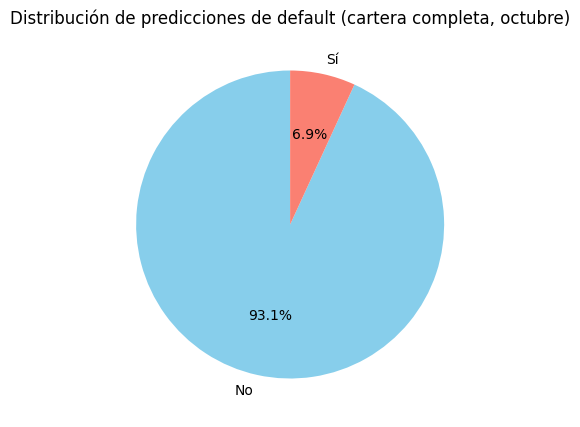

In [59]:
# --- Recuento con porcentajes para TODA la cartera ---
pred_counts_all = preds_oct_all['pred_default_oct'].value_counts().reset_index()
pred_counts_all.columns = ['Predicción', 'Número de clientes']
pred_counts_all['Porcentaje'] = pred_counts_all['Número de clientes'] / pred_counts_all['Número de clientes'].sum()

# --- Gráfico circular ---
plt.figure(figsize=(5,5))
plt.pie(
    pred_counts_all['Número de clientes'],
    labels=pred_counts_all['Predicción'],
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon'],
    startangle=90
)
plt.title("Distribución de predicciones de default (cartera completa, octubre)")
plt.show()



Tras aplicar el modelo final de **CatBoost** sobre los clientes en el mes de octubre, se obtuvieron las siguientes predicciones:

- **27163 clientes (93,1%)** fueron clasificados como **No** (*no incurrirán en default*).  
- **2000 clientes (6,9%)** fueron clasificados como **Sí** (*probabilidad de default*).

Estos resultados muestran que el modelo estima un porcentaje relativamente reducido de clientes en riesgo de impago (alrededor del 7%). Aunque la mayoría de la cartera se mantiene solvente, es relevante destacar este grupo minoritario de clientes en riesgo, ya que representa posibles pérdidas para la entidad si no se gestionan adecuadamente.

Desde una perspectiva de negocio, el valor del modelo reside en **detectar de forma preventiva** a estos clientes con alta probabilidad de incumplimiento, lo que permite priorizar medidas de gestión (renegociación de condiciones, ajustes en límites de crédito o acciones de seguimiento). De esta forma, la organización puede **reducir su exposición al riesgo crediticio** y **optimizar la rentabilidad de la cartera**.



En un banco, este tipo de modelo se desplegaría como un servicio interno, por ejemplo a través de una **API**, de forma que cada vez que un cliente solicite una operación de crédito o un nuevo producto financiero, el sistema **consulte automáticamente** su score de riesgo. Esto permitiría que el modelo se utilice de manera escalable y en tiempo real, apoyando la toma de decisiones del área de riesgos sin necesidad de procesar manualmente grandes volúmenes de datos. De este modo, la productivización del modelo consistiría no solo en generar predicciones masivas para toda la cartera, como se ha mostrado aquí, sino también en integrarlo dentro de los flujos operativos del banco para un uso continuo y actualizado.


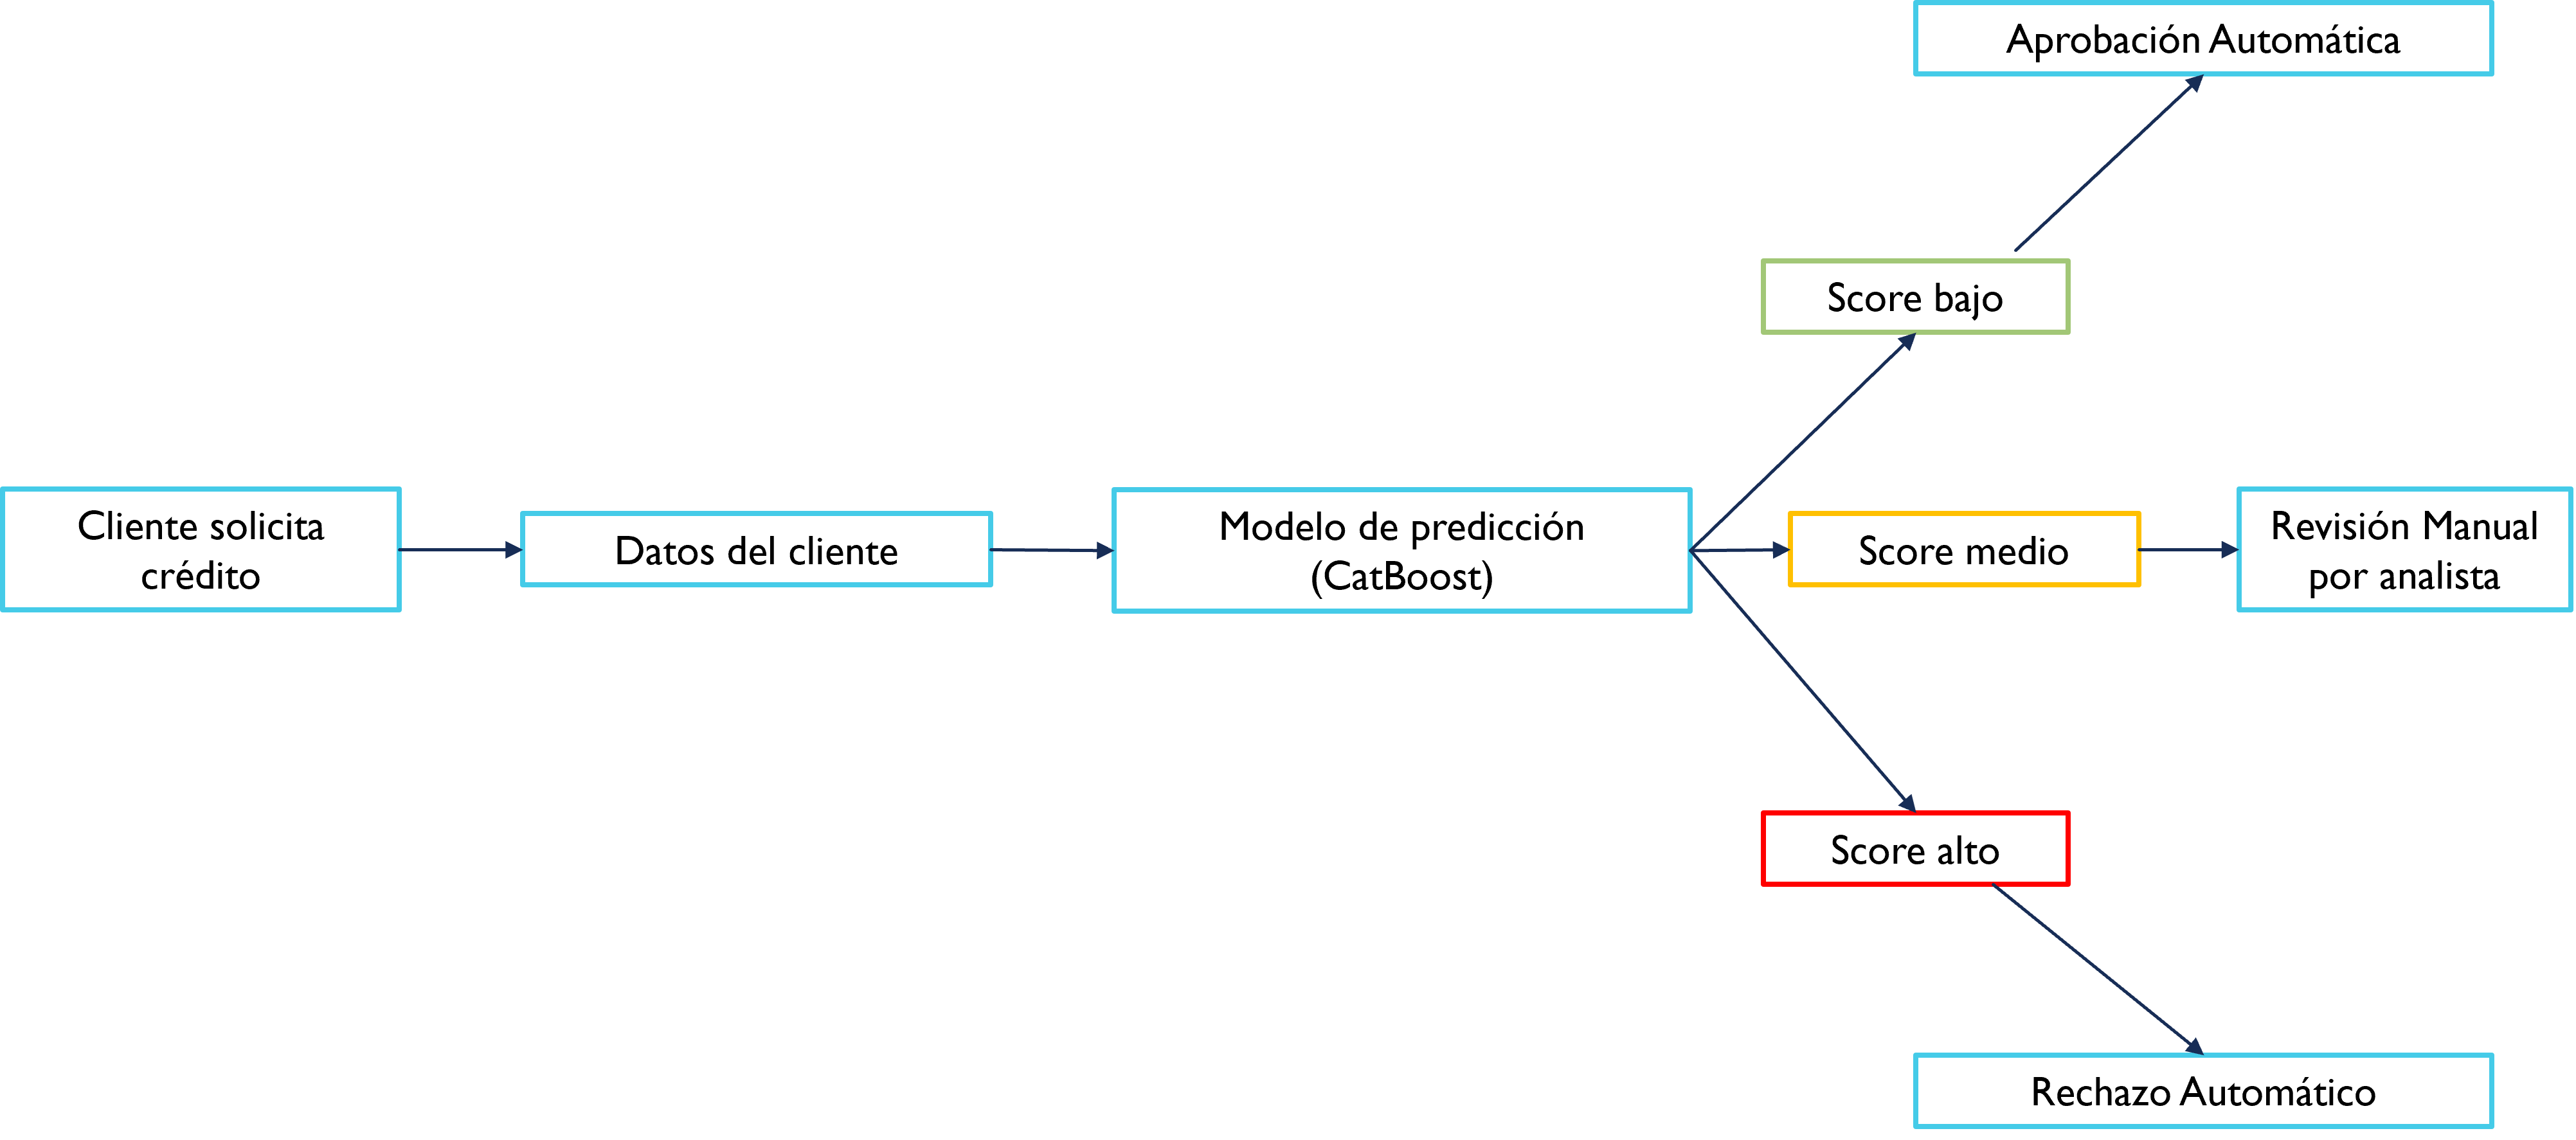

In [65]:
from IPython.display import Image, display
display(Image(filename="/content/Esquema_productivizacion.png"))


## Conclusiones y Recomendaciones

El presente trabajo ha abordado el problema de la **predicción de impago en clientes de tarjetas de crédito** utilizando un conjunto de datos real ampliamente empleado en la literatura académica y en competiciones de machine learning. A lo largo del proyecto se han seguido las etapas habituales en un flujo de data science: análisis exploratorio, estudio bivariado de variables, generación de nuevas variables (feature engineering), construcción de modelos predictivos y propuesta de productivización.

En primer lugar, el análisis exploratorio permitió identificar patrones relevantes, como la relación entre retrasos de pago (variable `PAY`) y la probabilidad de `default`, así como la limitada capacidad explicativa de las variables sociodemográficas (sexo, edad, educación y estado civil). Esto justificó su exclusión en el modelo final, priorizando variables financieras y derivadas que aportan mayor valor predictivo.

Posteriormente, se llevaron a cabo transformaciones sobre los datos, creando indicadores como ratios de utilización de crédito, pagos acumulados sobre límite, desviaciones en los montos de pago y medidas de retraso máximo o frecuencia de retrasos. Estas nuevas variables mostraron una mejor capacidad para capturar el comportamiento crediticio de los clientes y sirvieron como base para los modelos de predicción.

En cuanto a la modelización, se planteó inicialmente la **regresión logística** como modelo base, dada su interpretabilidad y relevancia en el ámbito financiero. Los resultados mostraron un rendimiento moderado (AUC-ROC ≈ 0.69 tras un tuning ligero), pero suficiente para establecer un punto de referencia.

Sobre esta base, se probaron modelos más avanzados. **XGBoost**, tras un ajuste de hiperparámetros, ofreció un rendimiento superior (AUC-ROC ≈ 0.7269), confirmando su idoneidad para capturar relaciones no lineales en datos tabulares. Finalmente, se exploró el uso de **CatBoost**, modelo de gradient boosting especialmente diseñado para trabajar con variables categóricas. Sin técnicas de sobremuestreo, CatBoost logró un rendimiento similar al de XGBoost (AUC-ROC ≈ 0.727), confirmando que este tipo de modelos son los más adecuados para el dataset en cuestión.

El modelo final se aplicó a la cartera de clientes para predecir la probabilidad de default en el mes de octubre. Los resultados indicaron que aproximadamente el 7% de los clientes se encuentran en riesgo de impago, lo que constituye una información de alto valor para la gestión del riesgo crediticio.

Por último, se propuso un esquema de productivización sencillo, en el que el modelo puede integrarse en el flujo habitual de una entidad financiera: a partir de los datos actualizados de cada cliente, se genera un **score de riesgo** y se facilita una interpretación visual mediante dashboards o reportes. Este enfoque permitiría utilizar el modelo como una herramienta operativa real, sujeta a monitorización y a futuras mejoras.

En resumen, los resultados confirman la **utilidad de los modelos de gradient boosting** para la predicción de impago en contextos financieros, superando en rendimiento a modelos lineales tradicionales. No obstante, el AUC-ROC alcanzado sugiere que aún existe margen de mejora mediante un mayor ajuste de hiperparámetros, la inclusión de técnicas de feature selection más avanzadas o la combinación de modelos en ensamblados. Aun así, el proyecto demuestra de forma sólida cómo un pipeline completo de data science puede generar valor en el ámbito de la gestión del riesgo crediticio, aportando tanto rigor analítico como aplicabilidad práctica.

## Bibliografía
Lichman, M. (2013). UCI Machine Learning Repository. University of California, Irvine, School of Information and Computer Science. Recuperado de http://archive.ics.uci.edu/ml